In [1]:
# Se importan la libreria necesaria para el proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
import os
# %pip install scikit-learn
from sklearn.linear_model import LinearRegression
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import root_mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [35]:
# Leemos el archivos cvs

df = pd.read_csv('/Users/fdi/Documents/GitHub/Modulo1_Proyecto/mcp_1.csv')

In [3]:
df.head() #Mostramos las primeras y ultimas filas del Dataframe

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.0,NaN,921078.0,3.78,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.64,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.0,0.3579,191887.0,2.64,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.0,0.0544,167241.0,1.02,40.0,10/1/2023,1/1/2023,5.0,6.0,Low


In [4]:
df.info() #Mostramos infomaciones basicas del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

In [5]:
df.shape

(5000, 19)

In [6]:
df.dtypes #Mostramos el tipo de columna y su dato

Campaign_ID                object
Channel                    object
Product_Category           object
Region                     object
Budget                    float64
Spend                     float64
Impressions               float64
Clicks                    float64
CTR                       float64
Conversions               float64
CR                        float64
Revenue                   float64
ROI                       float64
Duration                  float64
Start_Date                 object
End_Date                   object
Customer_Satisfaction     float64
Campaign_Effectiveness    float64
Market_Segment             object
dtype: object

In [7]:
df.isnull().sum()
percent_df = (5000/(df.isnull().sum()))
percent_df

Campaign_ID               19.305019
Channel                   19.685039
Product_Category          18.726592
Region                    19.157088
Budget                    10.000000
Spend                     10.020040
Impressions                9.920635
Clicks                    10.288066
CTR                       10.040161
Conversions               10.121457
CR                        10.080645
Revenue                    9.823183
ROI                       10.101010
Duration                  10.438413
Start_Date                19.305019
End_Date                  19.455253
Customer_Satisfaction     10.162602
Campaign_Effectiveness    10.204082
Market_Segment            19.083969
dtype: float64

In [37]:
# Se analiza si hay filas duplicadas
df.duplicated().sum()

np.int64(0)

Siendo una empresa de Marketing al no tener referencia de la campaña procedemos en corregir estos valores, siendo esto enviado en modo sequenciual.

In [24]:
for i in range(len(df)):
    # Si Campaign_ID está nulo, generamos el siguiente ID
    if pd.isna(df.loc[i, 'Campaign_ID']):
        # Generamos el ID usando el índice actual más 1, ajustando con ceros
        df.loc[i, 'Campaign_ID'] = f"CAM{str(i + 1).zfill(4)}"
# Guardamos el archivo con los cambios
df.to_csv('/Users/fdi/Documents/GitHub/Modulo1_Proyecto/mcp_1r.csv', index=False)

In [2]:
df2 = pd.read_csv('/Users/fdi/Documents/GitHub/Modulo1_Proyecto/mcp_1r.csv')

In [3]:
df2.isnull().sum()
percent_df2 = (5000/(df2.isnull().sum()))
percent_df2

Campaign_ID                     inf
Channel                   19.685039
Product_Category          18.726592
Region                    19.157088
Budget                    10.000000
Spend                     10.020040
Impressions                9.920635
Clicks                    10.288066
CTR                       10.040161
Conversions               10.121457
CR                        10.080645
Revenue                    9.823183
ROI                       10.101010
Duration                  10.438413
Start_Date                19.305019
End_Date                  19.455253
Customer_Satisfaction     10.162602
Campaign_Effectiveness    10.204082
Market_Segment            19.083969
dtype: float64

In [4]:
# Se van actualizando filas y columnas de texto donde hay valores nulos en la columnas: Channel, Product_Category y Region
df2[['Channel', 'Product_Category', 'Region']] = df2[['Channel', 'Product_Category', 'Region']].fillna('Unknown')
df2

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.000,NaN,0.0785,7993.0,0.3414,849005.0,0.640000,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,Unknown,Health,Sarawak,468792.0,33743.0,527513.000,4130.0,0.9479,9459.0,NaN,921078.0,3.780000,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.000,12209.0,NaN,7168.0,0.0517,51142.0,3.640000,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.000,34391.0,0.6157,7190.0,0.3579,191887.0,2.640000,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.000,13056.0,NaN,1794.0,0.0544,167241.0,1.020000,40.0,10/1/2023,1/1/2023,5.0,6.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CAM4996,Email,Automotive,Kuala Lumpur,373204.0,239182.0,947505.000,27359.0,0.4446,2725.0,0.1643,739721.0,17.287862,170.0,4/4/2023,15/12/2023,4.0,5.0,Low
4996,CAM4997,Radio,Electronics,Kuala Lumpur,81357.0,381641.0,270685.000,2575.0,0.8224,1555.0,0.2425,324435.0,1.500000,148.0,28/1/2023,26/12/2023,2.0,7.0,Low
4997,CAM4998,Radio,Unknown,Kuala Lumpur,216060.0,122475.0,6042568.044,42563.0,0.5894,NaN,NaN,647246.0,NaN,340.0,7/6/2023,6/12/2023,3.0,5.0,NaN
4998,CAM4999,Social Media,Electronics,Kuala Lumpur,120531.0,433558.0,857140.000,7037.0,0.2863,3374.0,0.9039,373110.0,0.390000,76.0,2/11/2023,23/8/2023,2.0,1.0,Medium


In [5]:
# Convertir las columnas Start_Date y End_Date a formato datetime
df2['Start_Date'] = pd.to_datetime(df2['Start_Date'], errors='coerce', dayfirst=True)
df2['End_Date'] = pd.to_datetime(df2['End_Date'], errors='coerce', dayfirst=True)

# Asegurar que Start_Date sea siempre anterior a End_Date
df2['Start_Date'], df2['End_Date'] = [
    df2[['Start_Date', 'End_Date']].min(axis=1),  # Start_Date será la fecha menor
    df2[['Start_Date', 'End_Date']].max(axis=1)   # End_Date será la fecha mayor
]

# Calcular la duración en días entre Start_Date y End_Date
df2['Duration'] = (df2['End_Date'] - df2['Start_Date']).dt.days

In [6]:
# Eliminamos las filas con Start_Date o End_Date nulos
df2 = df2.dropna(subset=['Start_Date'])
df2 = df2.dropna(subset=['End_Date'])
df2.shape

(4986, 19)

In [7]:
# Se van a remplazar los valores en la columna Customer_Satisfaction que estan fuera del rango 1-5 por NaN
df2['Customer_Satisfaction'] = df2['Customer_Satisfaction'].apply(lambda x: x if 1 <= x <= 5 else np.nan)


In [8]:
# Seleccionar solo las filas sin valores nulos en Customer_Satisfaction y Revenue para el entrenamiento del modelo
train_data = df2.dropna(subset=['Customer_Satisfaction', 'Revenue'])

# Separar características (X) y objetivo (y)
X_train = train_data[['Revenue']]
y_train = train_data['Customer_Satisfaction']

# Llenar valores nulos en las características (en este caso, sólo Revenue) si es necesario
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Crear el modelo de regresión
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Identificar los valores nulos en Customer_Satisfaction para predecirlos
X_missing = df2.loc[df2['Customer_Satisfaction'].isna(), ['Revenue']]
X_missing = imputer.transform(X_missing)

# Predecir los valores de Customer_Satisfaction para los valores nulos
df2.loc[df2['Customer_Satisfaction'].isna(), 'Customer_Satisfaction'] = model.predict(X_missing)

In [9]:
# Se comprueba que nos hayan quedados valores nulos en la columna Customer_Satisfaction
nulos = df2[df2['Customer_Satisfaction'].isnull()]
nulos

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment


In [10]:
# Se van a remplazar los valores en la columna Campaign_Effectiveness que estan fuera del rango 1-10 por NaN
df2['Campaign_Effectiveness'] = df2['Campaign_Effectiveness'].apply(lambda x: x if 1 <= x <= 10 else np.nan)

In [11]:
# Seleccionar solo las filas sin valores nulos en Campaign_Effectiveness y Revenue para el entrenamiento del modelo
train_data = df2.dropna(subset=['Campaign_Effectiveness', 'Revenue'])

# Separar características (X) y objetivo (y)
X_train = train_data[['Revenue']]
y_train = train_data['Campaign_Effectiveness']

# Llenar valores nulos en las características (en este caso, sólo Revenue) si es necesario
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Crear el modelo de regresión
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Identificar los valores nulos en Campaign_Effectiveness para predecirlos
X_missing = df2.loc[df2['Campaign_Effectiveness'].isna(), ['Revenue']]
X_missing = imputer.transform(X_missing)

# Predecir los valores de Campaign_Effectiveness para los valores nulos
df2.loc[df2['Campaign_Effectiveness'].isna(), 'Campaign_Effectiveness'] = model.predict(X_missing)

In [12]:
# Se comprueba que nos hayan quedados valores nulos en la columna Campaign_Effectiveness
nulos = df2[df2['Campaign_Effectiveness'].isnull()]
nulos

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment


Usar KNN para resolver lo valores nulo.

In [13]:
dfml = df2[['Channel', 'Product_Category', 'Region', 'Market_Segment']].dropna(subset=['Market_Segment'])

# Separar el conjunto con y sin valores faltantes en 'Market_Segment'
df2_missing_segment = df2[df2['Market_Segment'].isna()]
df2_with_segment = dfml.dropna()

# Dividir en variables X e y
X = df2_with_segment[['Channel', 'Product_Category', 'Region']]
y = df2_with_segment['Market_Segment']

# Pipeline para procesar variables categóricas y aplicar KNN
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Channel', 'Product_Category', 'Region'])
    ])

# Definir el modelo KNN con pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Entrenar el modelo
pipeline.fit(X, y)

# Predecir los valores faltantes
X_missing = df2_missing_segment[['Channel', 'Product_Category', 'Region']]
df2.loc[df2['Market_Segment'].isna(), 'Market_Segment'] = pipeline.predict(X_missing)

In [14]:
df2.info() #Mostramos infomaciones basicas del DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Campaign_ID             4986 non-null   object        
 1   Channel                 4986 non-null   object        
 2   Product_Category        4986 non-null   object        
 3   Region                  4986 non-null   object        
 4   Budget                  4489 non-null   float64       
 5   Spend                   4488 non-null   float64       
 6   Impressions             4483 non-null   float64       
 7   Clicks                  4500 non-null   float64       
 8   CTR                     4488 non-null   float64       
 9   Conversions             4495 non-null   float64       
 10  CR                      4493 non-null   float64       
 11  Revenue                 4478 non-null   float64       
 12  ROI                     4494 non-null   float64      

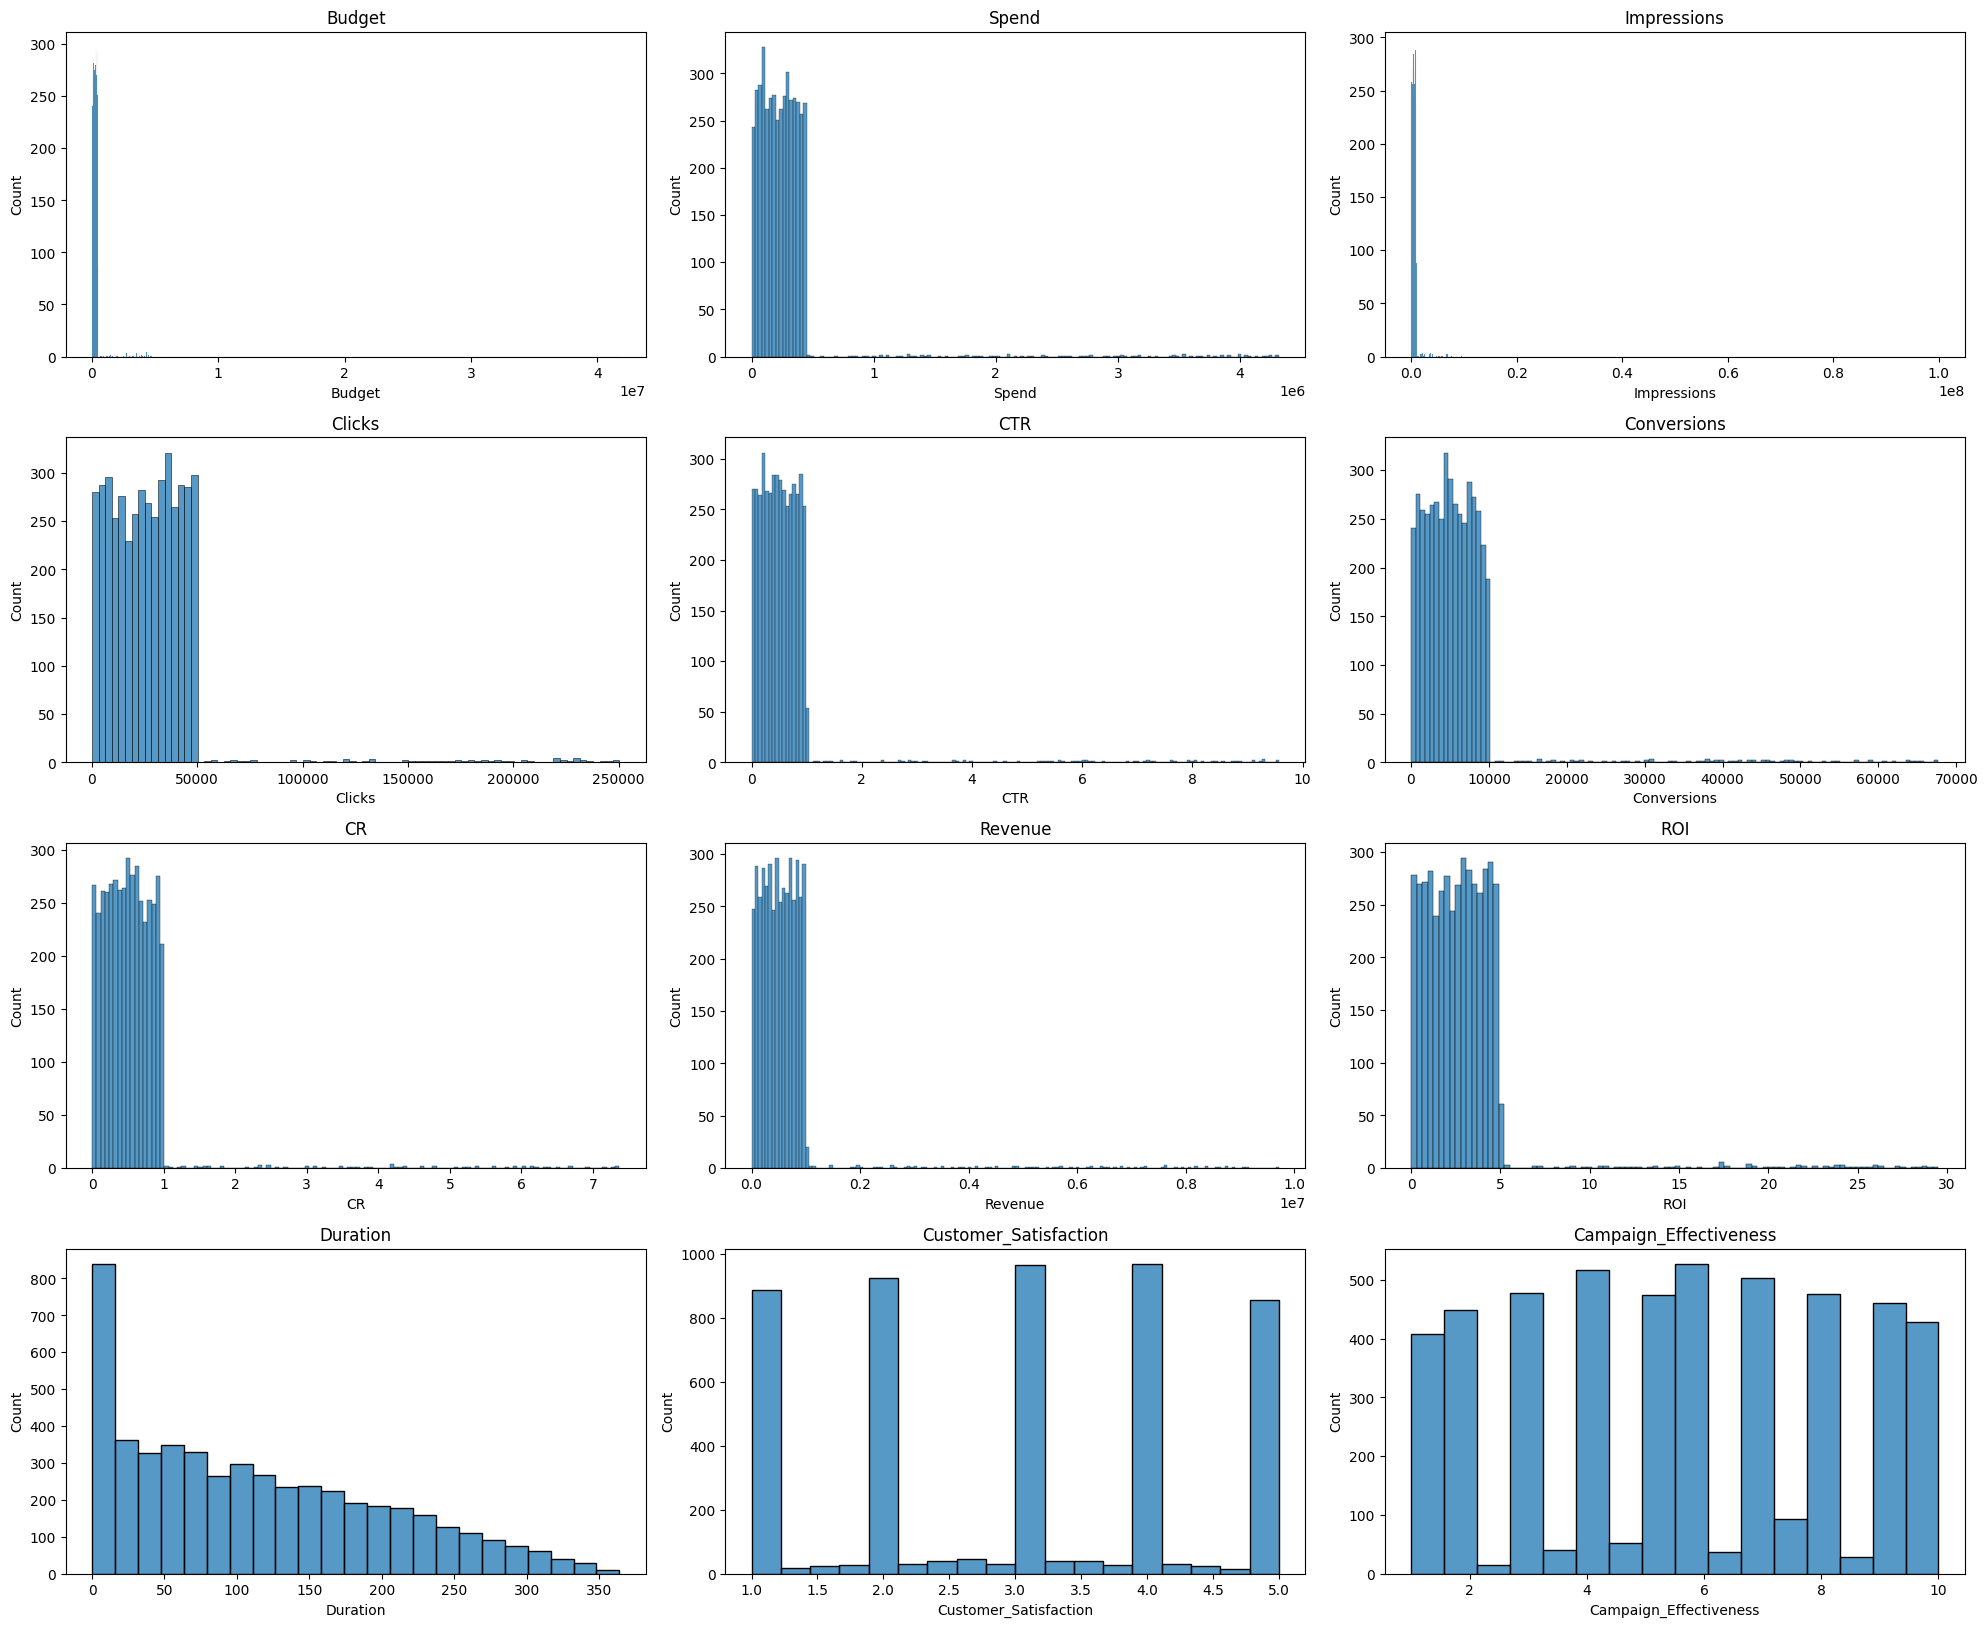

In [15]:
num_vars = df2.select_dtypes(include=['float64', 'int64']).columns

# Crear un lienzo con subplots
fig, axes = plt.subplots(nrows=len(num_vars)//3 + 1, ncols=3, figsize=(20, 4 * (len(num_vars)//3 + 1)))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Crear un histograma para cada variable numérica
for i, var in enumerate(num_vars):
    sns.histplot(df2[var], bins='auto', ax=axes[i])
    axes[i].set_title(var)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

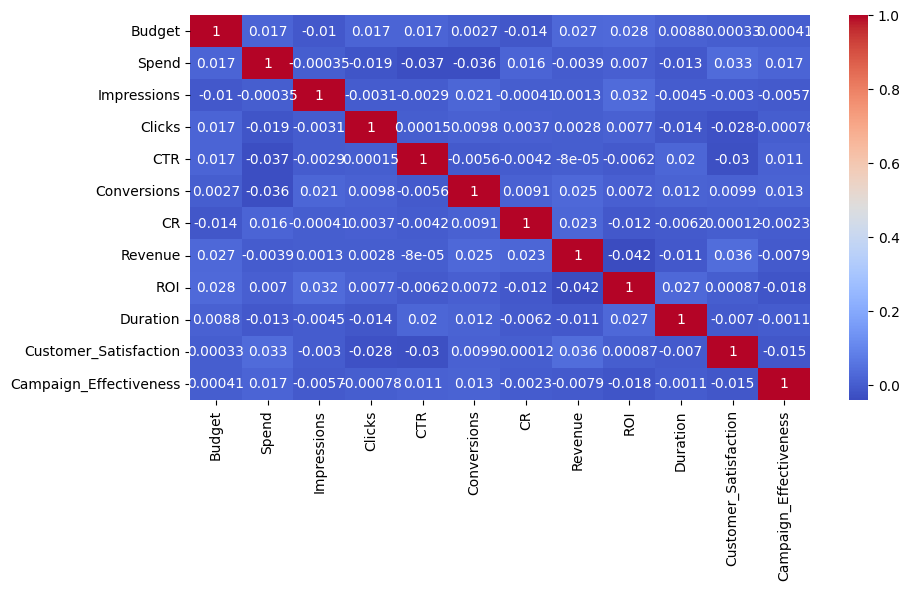

In [16]:
plt.figure(figsize=(10, 5))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(df2.corr('spearman', numeric_only=True), annot=True, cmap='coolwarm')

In [17]:
var_categoricas = df2.select_dtypes(include=['object']).columns
# valolores unicos
for var in var_categoricas:
    print(f"{var}: {df2[var].unique()}")

Campaign_ID: ['CAM0001' 'CAM0003' 'CAM0004' ... 'CAM4998' 'CAM4999' 'CAM5000']
Channel: ['Billboard' 'Radio' 'Email' 'TV' 'Unknown' 'Social Media' 'News']
Product_Category: ['Fashion' 'Electronics' 'Automotive' 'Groceries' 'Health' 'Unknown']
Region: ['Kuala Lumpur' 'Penang' 'Sarawak' 'Unknown' 'Johor' 'Sabah' 'Malacca']
Market_Segment: ['Medium' 'High' 'Low']


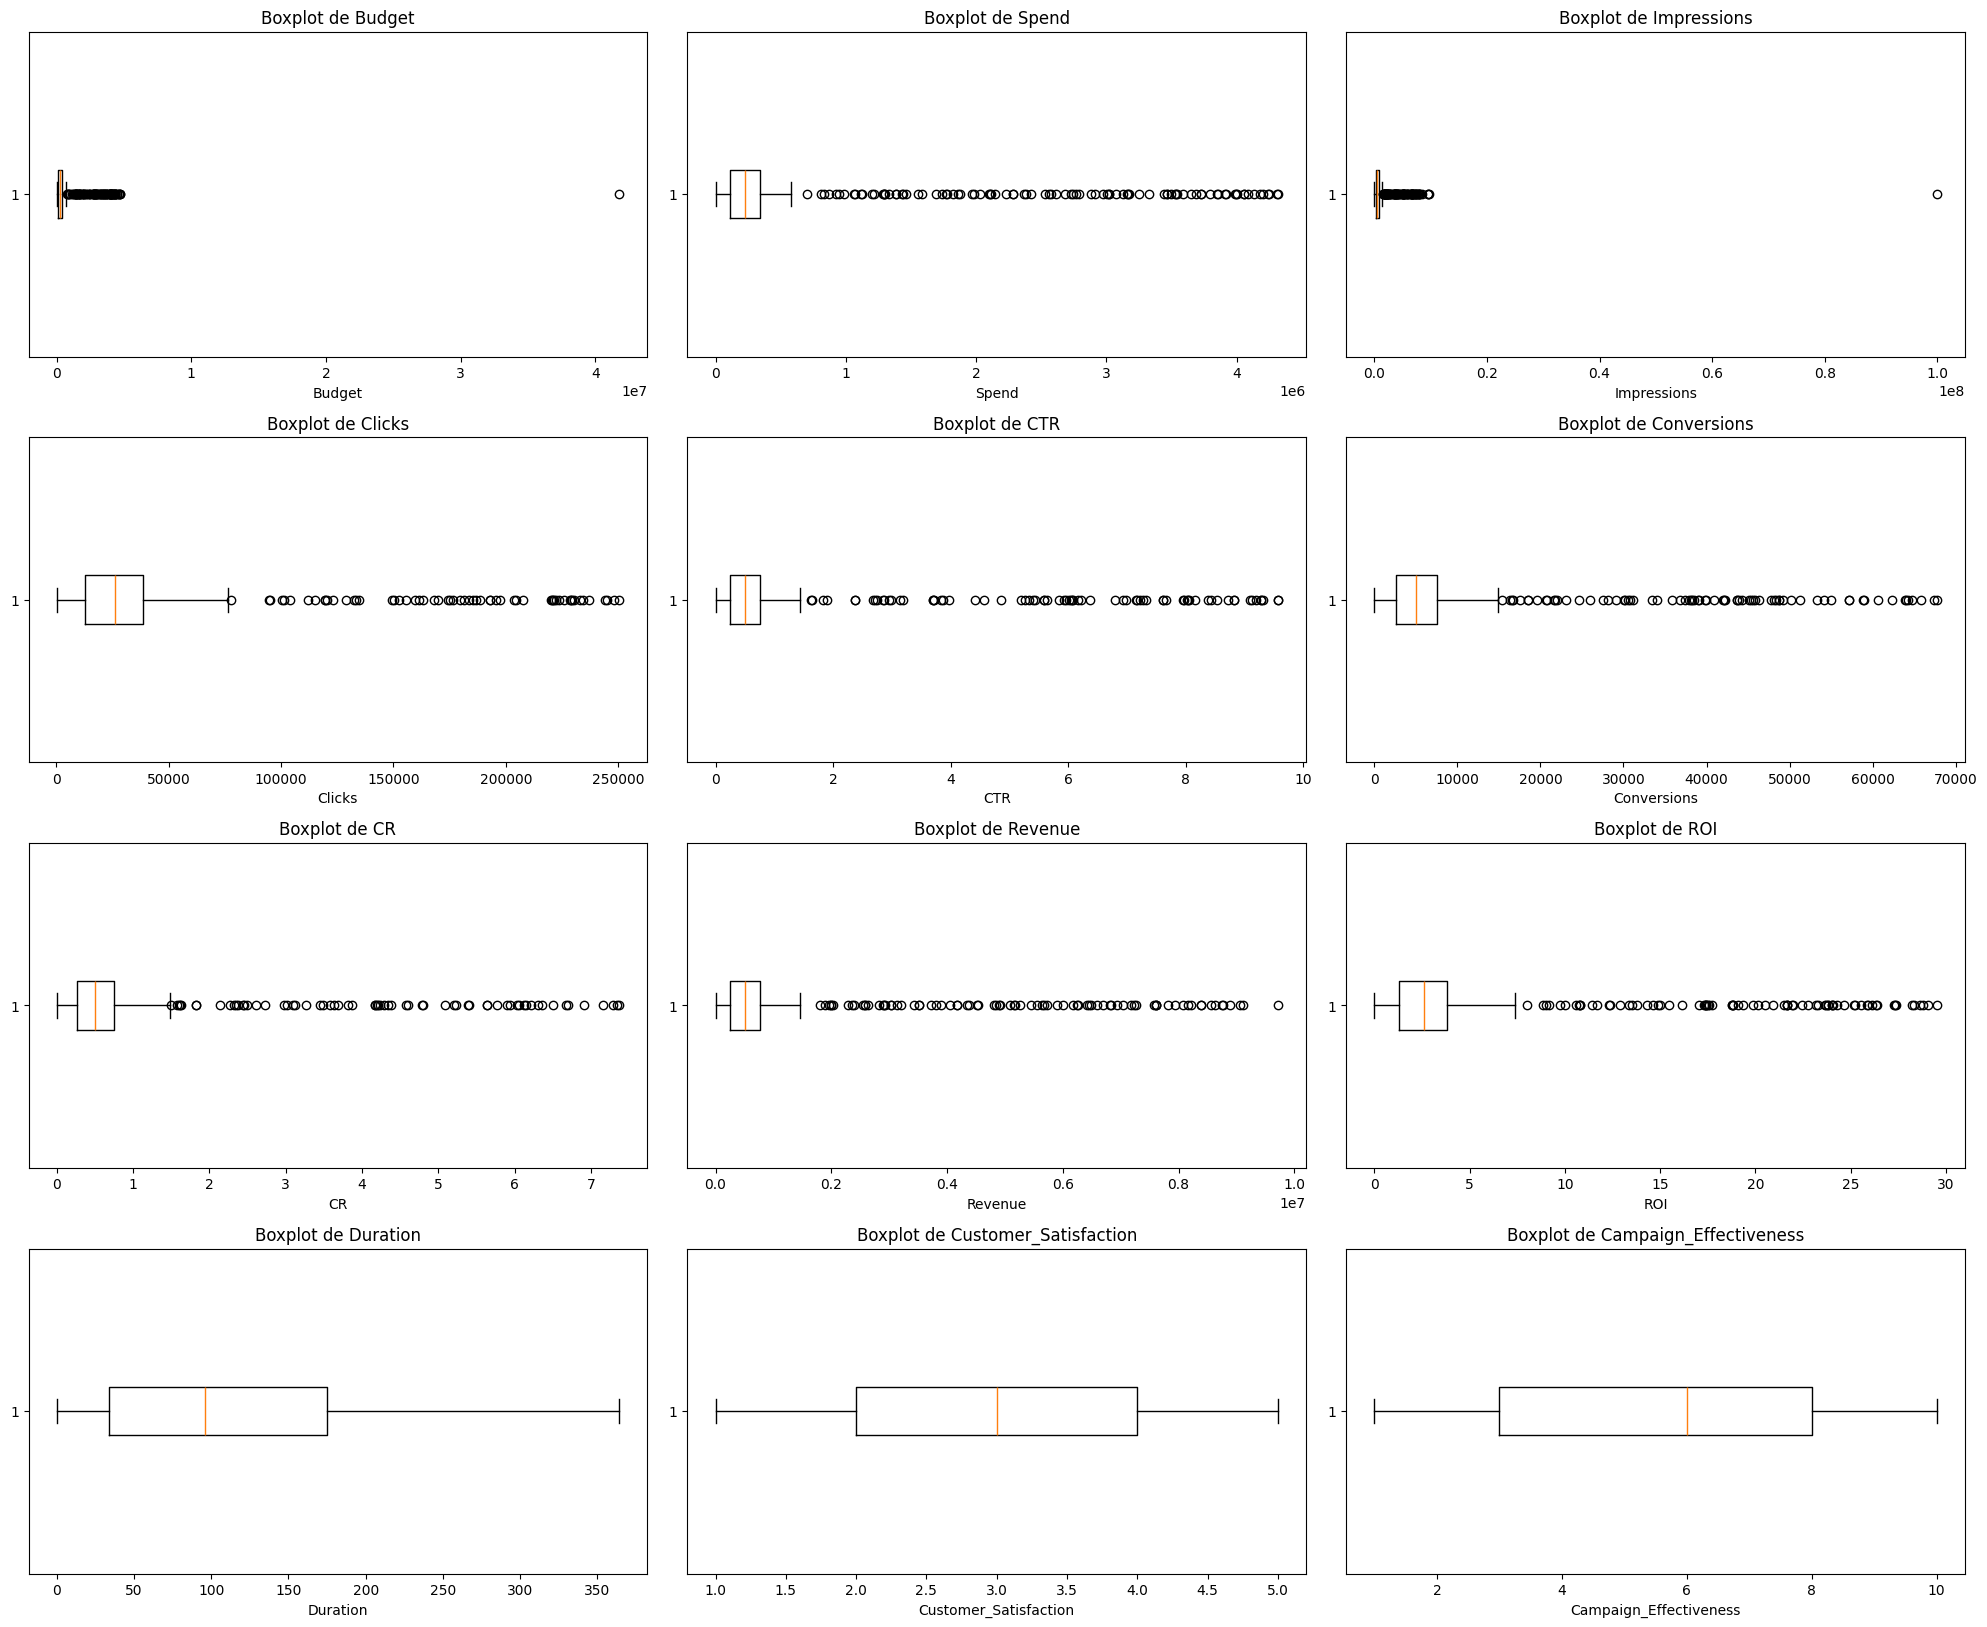

In [18]:
# Filtrar solo las columnas numéricas
numerical_columns = df2.select_dtypes(include='number').columns

# Crear un boxplot para cada columna numérica
# Crear un lienzo con subplots
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(20, 4 * (len(numerical_columns)//3 + 1)))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot para cada columna numérica
for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df2[column].dropna(), vert=False)
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_xlabel(column)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
# Calcular y contar los outliers para cada columna numérica
outliers_count = {}
for column in numerical_columns:
    # Calcular Q1 y Q3
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites de los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar los valores fuera de estos límites
    outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    outliers_count[column] = len(outliers)

# Mostrar la cantidad de outliers por columna
print("Cantidad de outliers en cada columna numérica:")
for column, count in outliers_count.items():
    print(f"{column}: {count}")

Cantidad de outliers en cada columna numérica:
Budget: 90
Spend: 97
Impressions: 88
Clicks: 59
CTR: 73
Conversions: 74
CR: 66
Revenue: 83
ROI: 79
Duration: 0
Customer_Satisfaction: 0
Campaign_Effectiveness: 0


In [20]:
# Ajustar los outliers de todas las variables numéricas usando IQR
for column in numerical_columns:
    # Calcular el rango intercuartílico (IQR) para la columna actual
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los outliers y ajustar los valores
    df2[column] = df2[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

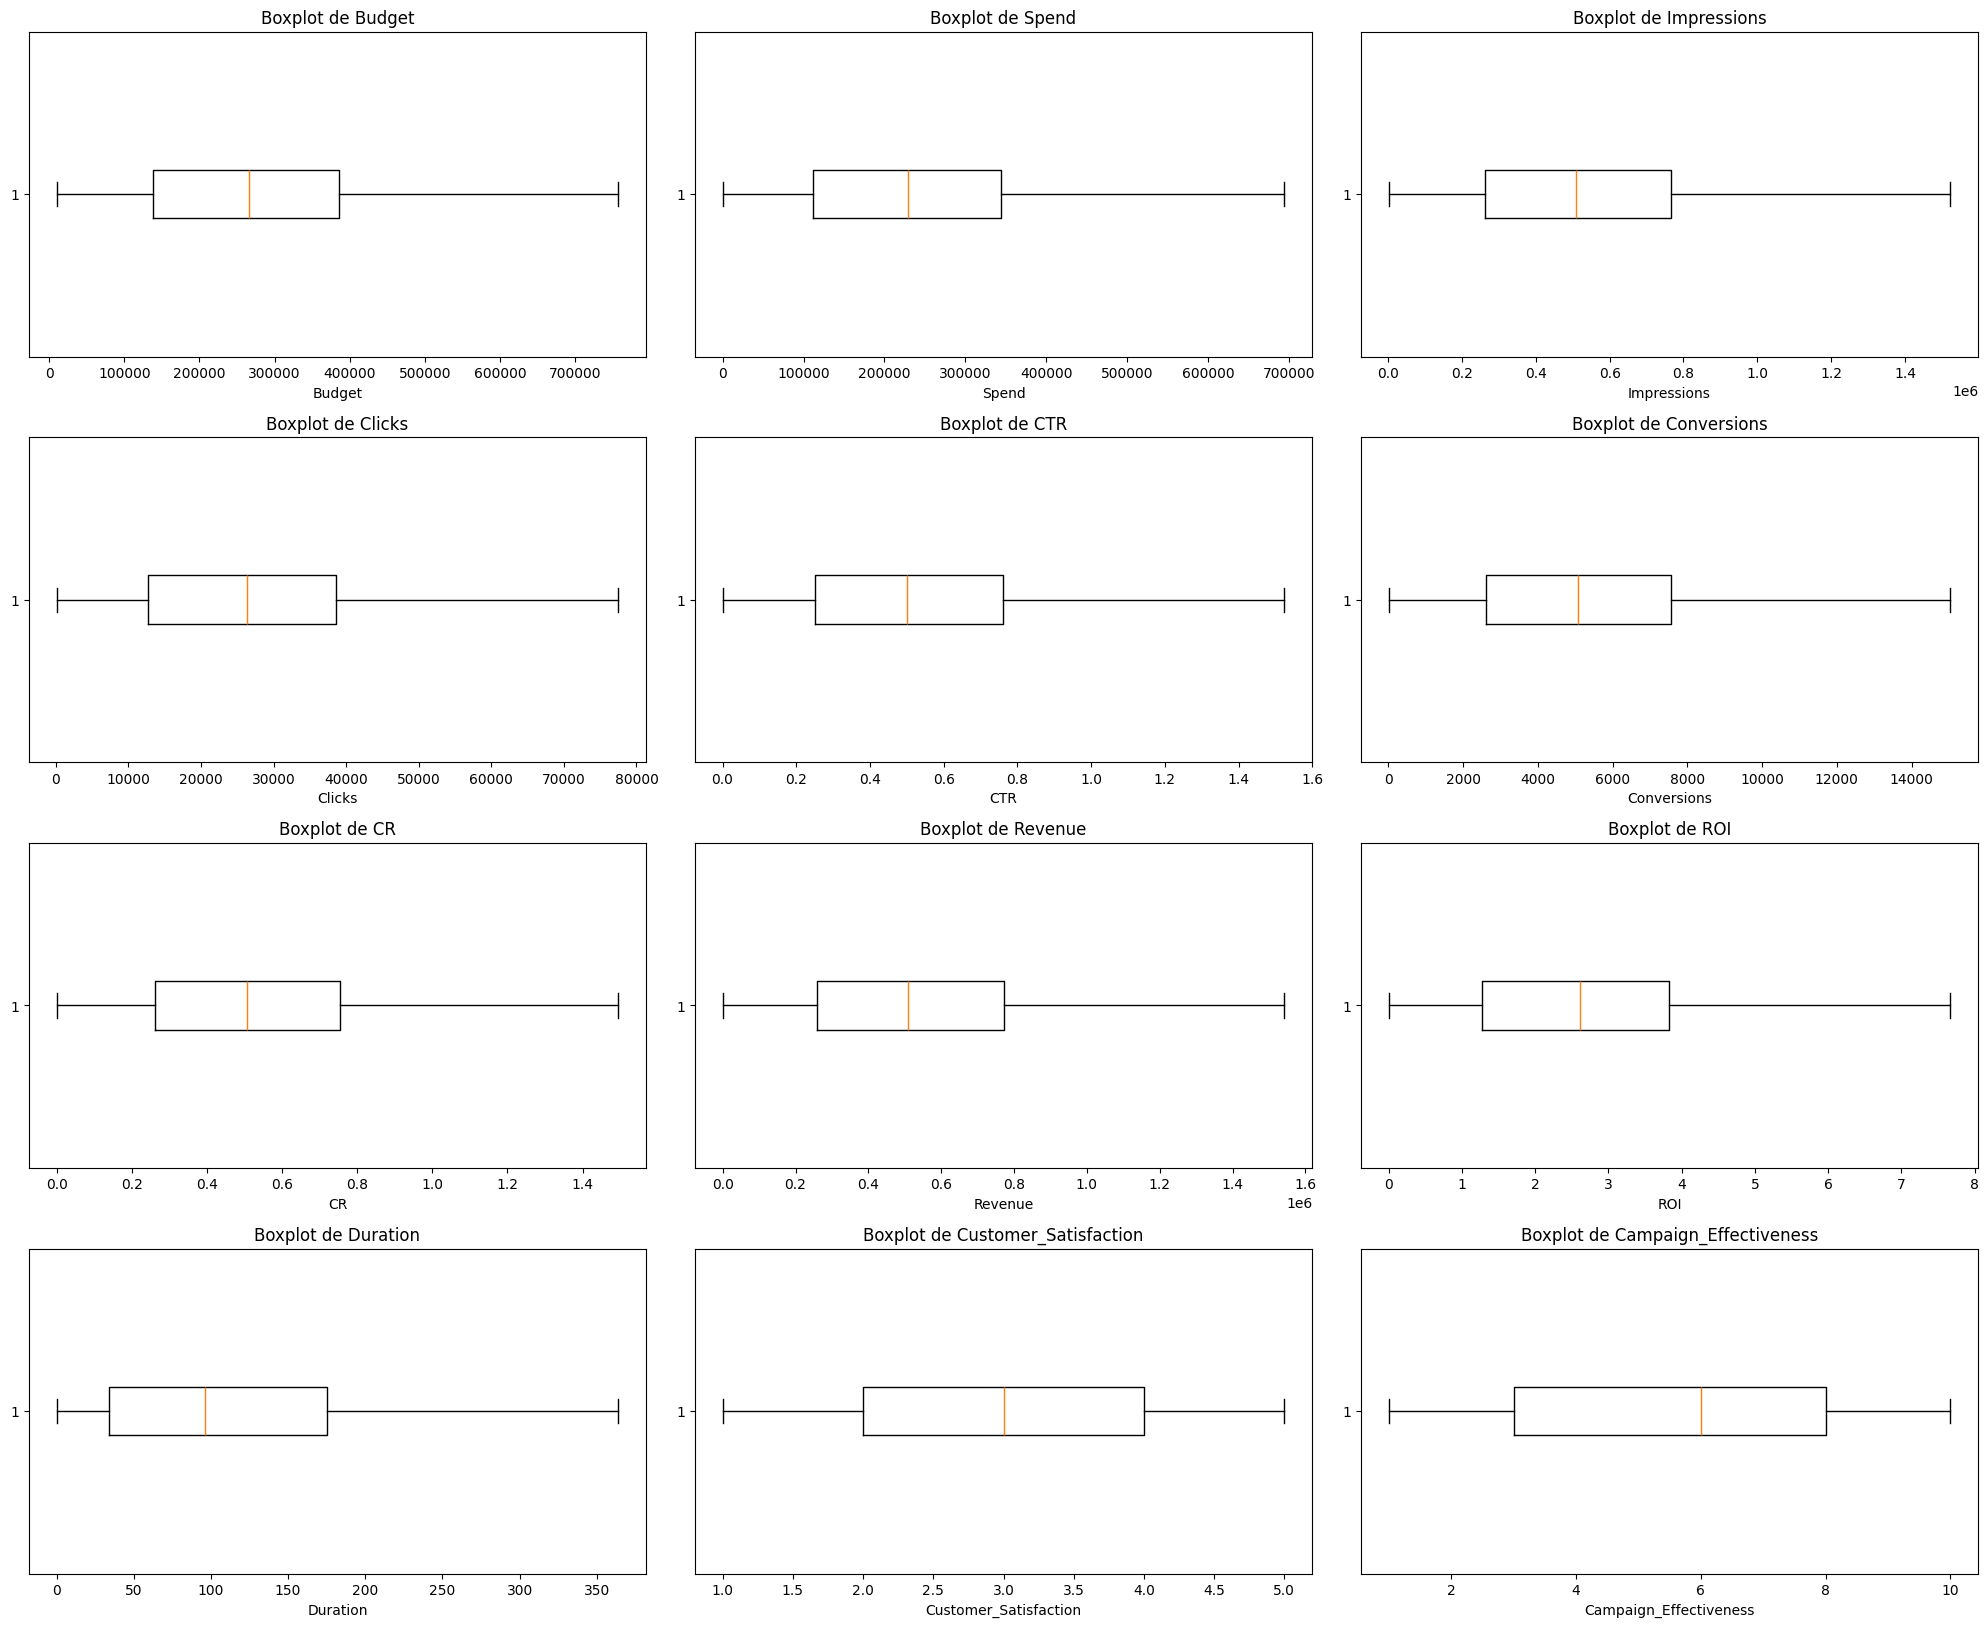

In [21]:
# Filtrar solo las columnas numéricas
numerical_columns = df2.select_dtypes(include='number').columns

# Crear un boxplot para cada columna numérica
# Crear un lienzo con subplots
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(20, 4 * (len(numerical_columns)//3 + 1)))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot para cada columna numérica
for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df2[column].dropna(), vert=False)
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_xlabel(column)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [22]:
df2.describe().round(2)

,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness
count,4489.00,4488.00,4483.00,4500.00,4488.00,4495.00,4493.00,4478.00,4494.00,4986.00,4986,4986,4986.00,4986.00
mean,267885.17,234838.88,522397.35,26178.54,0.51,5174.60,0.51,523991.13,2.61,111.19,2023-05-07 22:54:09.097473024,2023-08-27 03:33:43.104692992,3.00,5.55
min,10014.00,1.00,1593.00,104.00,0.00,13.00,0.00,0.00,0.00,0.00,2023-01-01 00:00:00,2023-01-01 00:00:00,1.00,1.00
25%,138000.00,111401.75,262294.00,12721.25,0.25,2602.00,0.26,257572.00,1.27,34.00,2023-02-22 00:00:00,2023-06-25 00:00:00,2.00,3.00
50%,265956.00,229326.50,508859.00,26266.00,0.50,5072.00,0.51,509176.00,2.61,96.00,2023-04-23 00:00:00,2023-09-11 00:00:00,3.00,6.00
75%,385762.00,344604.25,766523.00,38630.25,0.76,7576.00,0.76,771411.50,3.83,175.00,2023-07-09 00:00:00,2023-11-12 00:00:00,4.00,8.00
max,757405.00,694408.00,1522866.50,77493.75,1.52,15037.00,1.49,1542170.75,7.67,364.00,2024-01-01 00:00:00,2024-01-01 00:00:00,5.00,10.00
std,155941.81,145175.62,317934.73,15773.95,0.31,3107.79,0.31,319743.06,1.59,89.29,NaN,NaN,1.36,2.75


<Axes: >

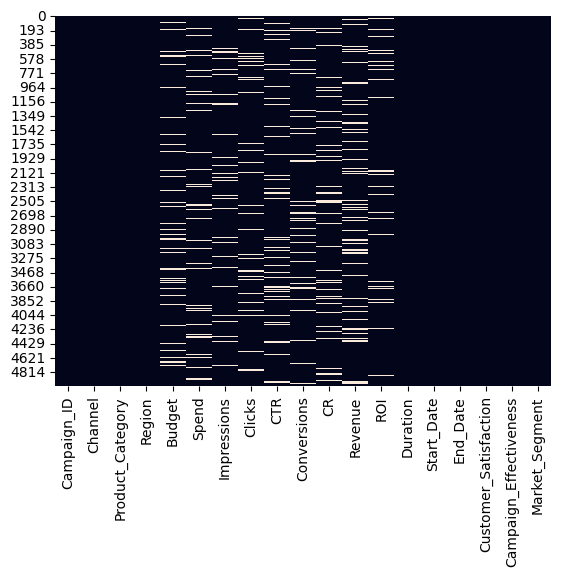

In [23]:
sns.heatmap(df2.isnull(), cbar=False)

In [24]:
df2.isnull().sum() / df2.shape[0] * 100

Campaign_ID                0.000000
Channel                    0.000000
Product_Category           0.000000
Region                     0.000000
Budget                     9.967910
Spend                      9.987966
Impressions               10.088247
Clicks                     9.747292
CTR                        9.987966
Conversions                9.847573
CR                         9.887686
Revenue                   10.188528
ROI                        9.867629
Duration                   0.000000
Start_Date                 0.000000
End_Date                   0.000000
Customer_Satisfaction      0.000000
Campaign_Effectiveness     0.000000
Market_Segment             0.000000
dtype: float64

In [25]:
# Vamos a corregir con KNN el Budget, usando Spend y Impressions
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes
variables_referencia = ['Spend', 'Impressions']
variables = variables_referencia + ['Budget']
df_imputar = df2[variables]

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputado = imputer.fit_transform(df_imputar)

# Convertir el resultado a un DataFrame
df_imputado = pd.DataFrame(df_imputado, columns=variables)

# Actualizar la columna 'Budget' en df2
df2['Budget'] = df_imputado['Budget']

In [26]:
# Vamos a corregir con KNN el Spend, usando Budget, Impressions y Clicks
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes
variables_referencia = ['Budget', 'Impressions', 'Clicks']
variables = variables_referencia + ['Spend']
df_imputar = df2[variables]

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputado = imputer.fit_transform(df_imputar)

# Convertir el resultado a un DataFrame
df_imputado = pd.DataFrame(df_imputado, columns=variables)

# Actualizar la columna 'Budget' en df2
df2['Spend'] = df_imputado['Spend']

In [27]:
# Vamos a corregir con KNN el Impressions, usando Spend, Clicks, Conversions, Revenue
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes
variables_referencia = ['Spend', 'Conversions', 'Clicks', 'Revenue']
variables = variables_referencia + ['Impressions']
df_imputar = df2[variables]

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputado = imputer.fit_transform(df_imputar)

# Convertir el resultado a un DataFrame
df_imputado = pd.DataFrame(df_imputado, columns=variables)

# Actualizar la columna 'Budget' en df2
df2['Impressions'] = df_imputado['Impressions']

In [28]:
# Vamos a corregir con KNN el Clicks, usando Impressions, Conversions, Revenue y CTR
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes
variables_referencia = ['CTR', 'Conversions', 'Impressions', 'Revenue']
variables = variables_referencia + ['Clicks']
df_imputar = df2[variables]

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputado = imputer.fit_transform(df_imputar)

# Convertir el resultado a un DataFrame
df_imputado = pd.DataFrame(df_imputado, columns=variables)

# Actualizar la columna 'Budget' en df2
df2['Clicks'] = df_imputado['Clicks']

In [29]:
# Vamos a corregir con KNN el CTR, usando Clicks, Impressions, Conversions, Clicks y CR
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes
variables_referencia = ['CR', 'Conversions', 'Impressions', 'Clicks']
variables = variables_referencia + ['CTR']
df_imputar = df2[variables]

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputado = imputer.fit_transform(df_imputar)

# Convertir el resultado a un DataFrame
df_imputado = pd.DataFrame(df_imputado, columns=variables)

# Actualizar la columna 'Budget' en df2
df2['CTR'] = df_imputado['CTR']

In [30]:
# Vamos a corregir con KNN el Conversions, usando Clicks, Revenue, CR, ROI y Impressions
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes
variables_referencia = ['Clicks', 'Revenue', 'CR', 'ROI', 'Impressions']
variables = variables_referencia + ['Conversions']
df_imputar = df2[variables]

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputado = imputer.fit_transform(df_imputar)

# Convertir el resultado a un DataFrame
df_imputado = pd.DataFrame(df_imputado, columns=variables)

# Actualizar la columna 'Budget' en df2
df2['Conversions'] = df_imputado['Conversions']

In [31]:
# Vamos a corregir con KNN el CR, usando Clicks, ROI, Revenue, Impressions
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes
variables_referencia = ['Clicks', 'ROI', 'Revenue', 'Impressions']
variables = variables_referencia + ['CR']
df_imputar = df2[variables]

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputado = imputer.fit_transform(df_imputar)

# Convertir el resultado a un DataFrame
df_imputado = pd.DataFrame(df_imputado, columns=variables)

# Actualizar la columna 'Budget' en df2
df2['CR'] = df_imputado['CR']

In [32]:
# Vamos a corregir con KNN el Revenue, usando Clicks y ROI
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes
variables_referencia = ['Clicks', 'ROI']
variables = variables_referencia + ['Revenue']
df_imputar = df2[variables]

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputado = imputer.fit_transform(df_imputar)

# Convertir el resultado a un DataFrame
df_imputado = pd.DataFrame(df_imputado, columns=variables)

# Actualizar la columna 'Budget' en df2
df2['Revenue'] = df_imputado['Revenue']

In [33]:
# Vamos a corregir con KNN el ROI, usando Clicks, Revenue, Spend y CR
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes
variables_referencia = ['Clicks', 'Revenue', 'Spend', 'CR']
variables = variables_referencia + ['ROI']
df_imputar = df2[variables]

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputado = imputer.fit_transform(df_imputar)

# Convertir el resultado a un DataFrame
df_imputado = pd.DataFrame(df_imputado, columns=variables)

# Actualizar la columna 'Budget' en df2
df2['ROI'] = df_imputado['ROI']

<Axes: >

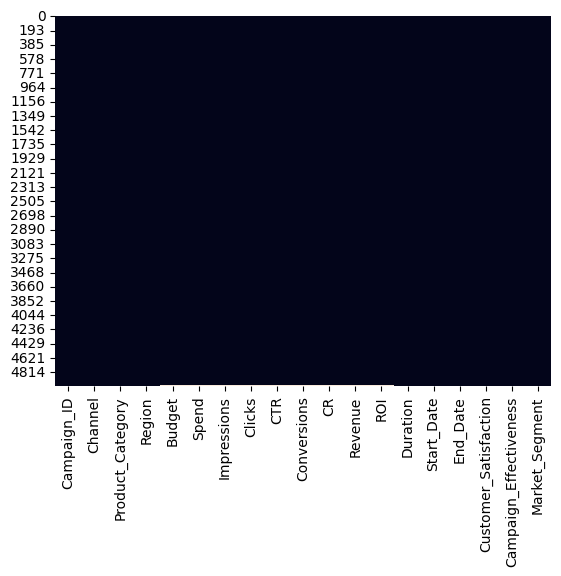

In [34]:
sns.heatmap(df2.isnull(), cbar=False)

In [35]:
# Contar cuántos valores están repartidos en cada segmento de Market_Segment respecto a Spend
market_segment_spend = df2.groupby('Market_Segment')['Spend'].count()

# Mostrar el resultado
print("Distribución de Spend en cada Market_Segment:")
print(market_segment_spend)

Distribución de Spend en cada Market_Segment:
Market_Segment
High      1677
Low       1645
Medium    1650
Name: Spend, dtype: int64


In [36]:
# Procedemos en coregir la incongruencias en las variables categoricas
# Seleccionar columnas categóricas
categorical_columns = df2.select_dtypes(include=['object']).columns

# Corregir inconsistencias en datos categóricos
for col in categorical_columns:
    df2[col] = df2[col].str.strip().str.lower()

# Verificar valores únicos en cada columna categórica
for col in categorical_columns:
    print(f"Valores únicos en '{col}':")
    print(df2[col].unique())
    print("\n")

Valores únicos en 'Campaign_ID':
['cam0001' 'cam0003' 'cam0004' ... 'cam4998' 'cam4999' 'cam5000']


Valores únicos en 'Channel':
['billboard' 'radio' 'email' 'tv' 'unknown' 'social media' 'news']


Valores únicos en 'Product_Category':
['fashion' 'electronics' 'automotive' 'groceries' 'health' 'unknown']


Valores únicos en 'Region':
['kuala lumpur' 'penang' 'sarawak' 'unknown' 'johor' 'sabah' 'malacca']


Valores únicos en 'Market_Segment':
['medium' 'high' 'low']




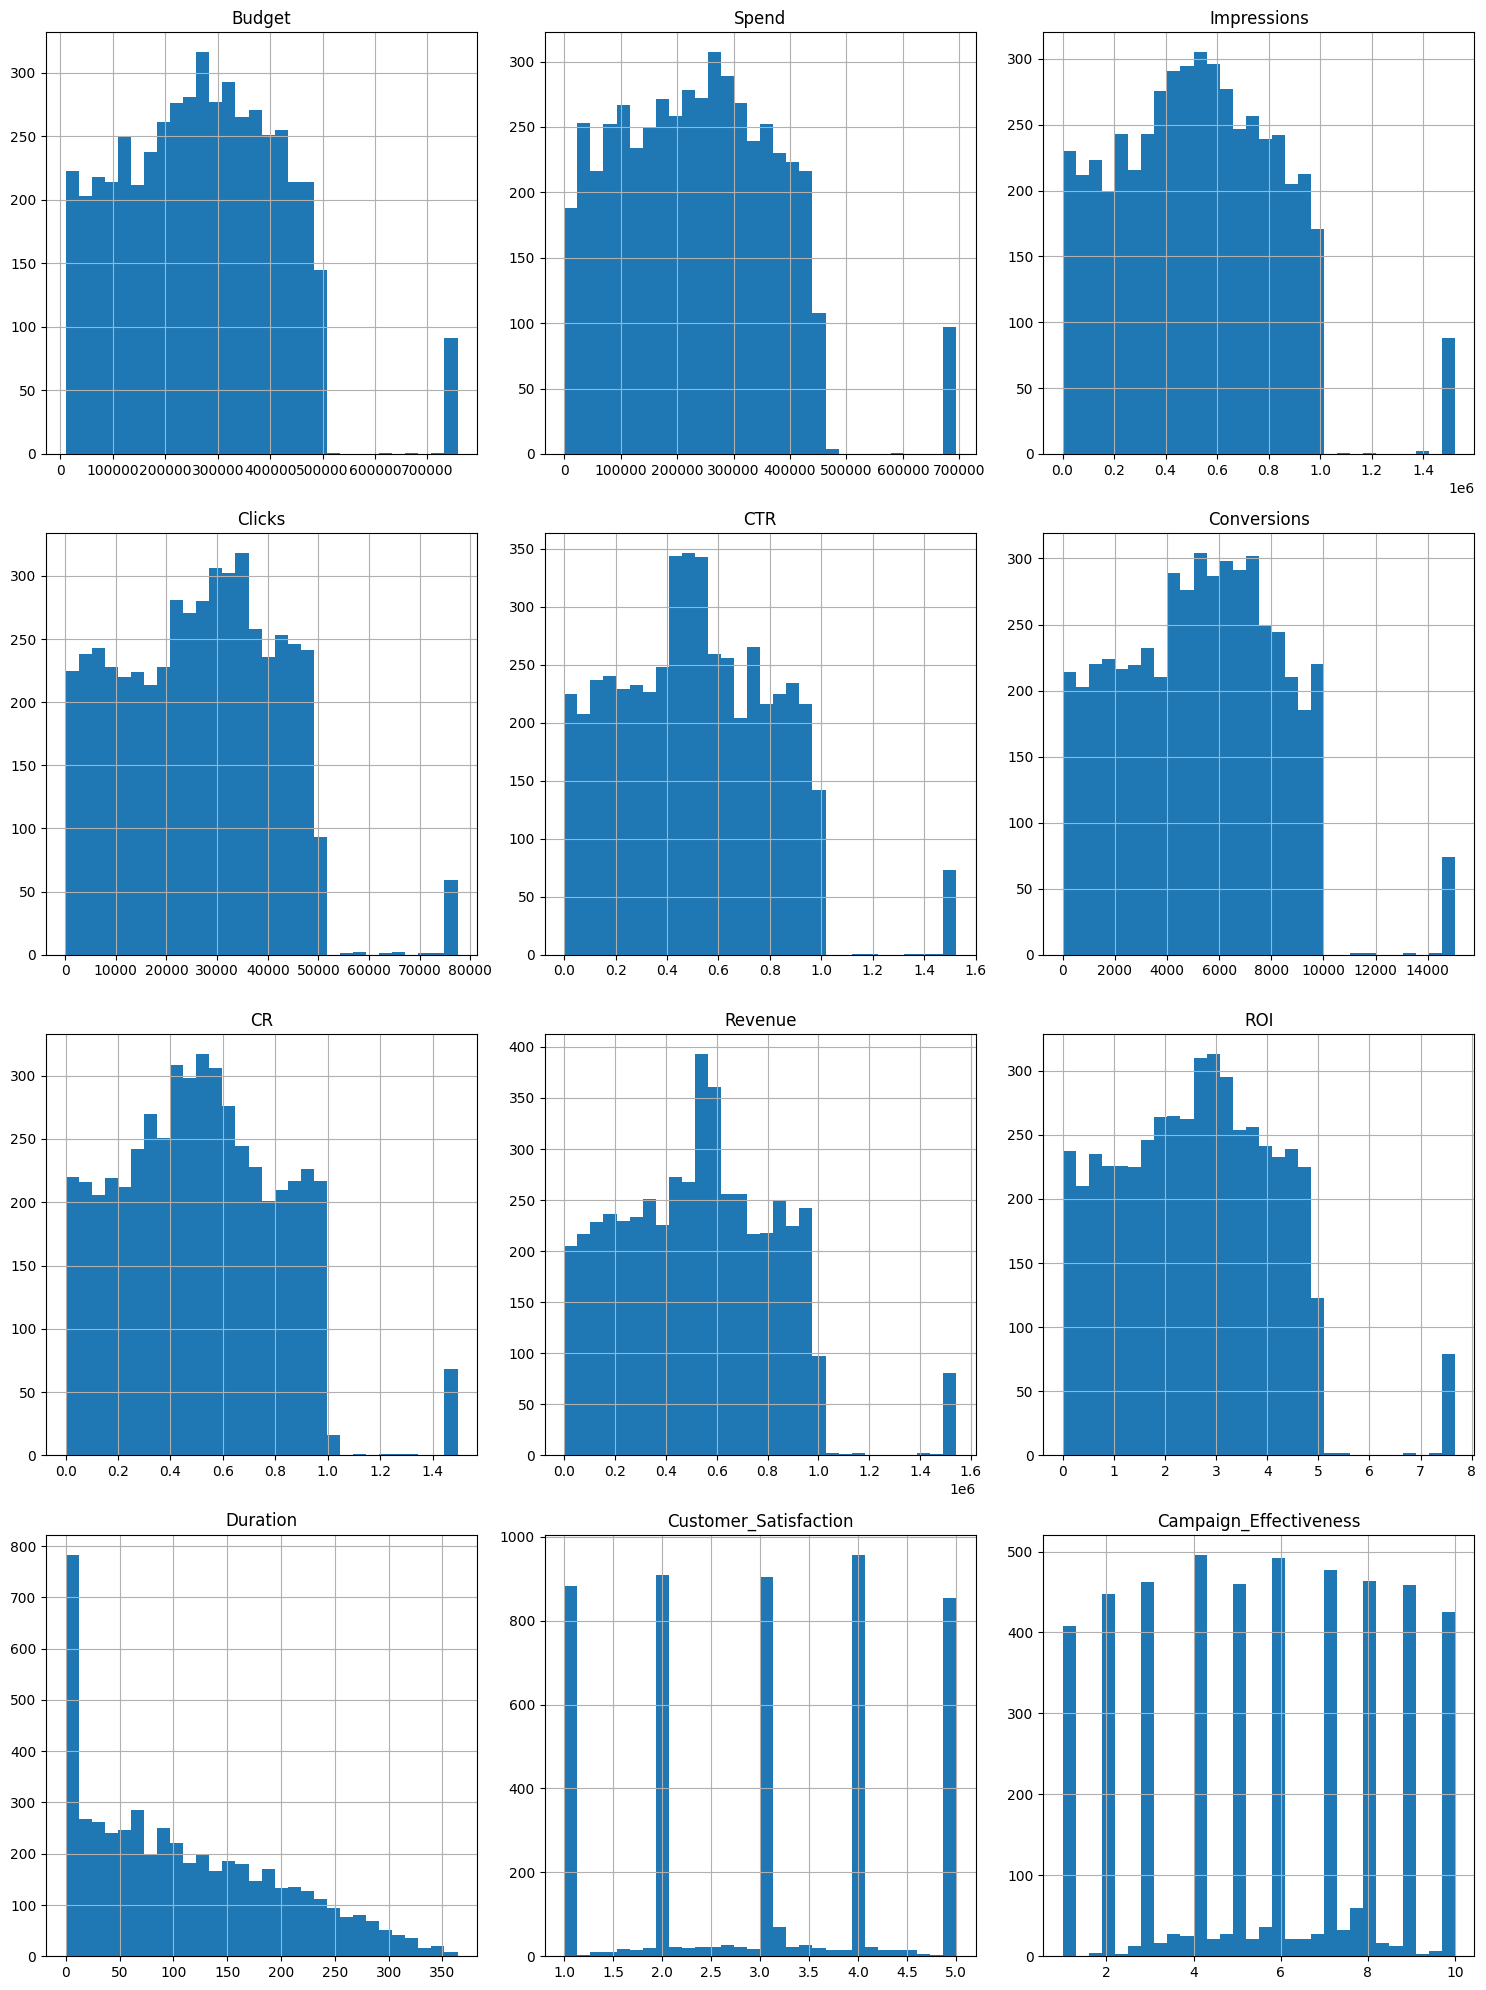

In [37]:
# Seleccionar columnas numéricas
numerical_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Crear un lienzo de subplots
num_cols = 3  # Número de columnas en la cuadrícula
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()

# Generar histogramas para cada variable numérica
for i, col in enumerate(numerical_columns):
    df2[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(col)

# Eliminar ejes vacíos si los hay
for ax in axes[len(numerical_columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

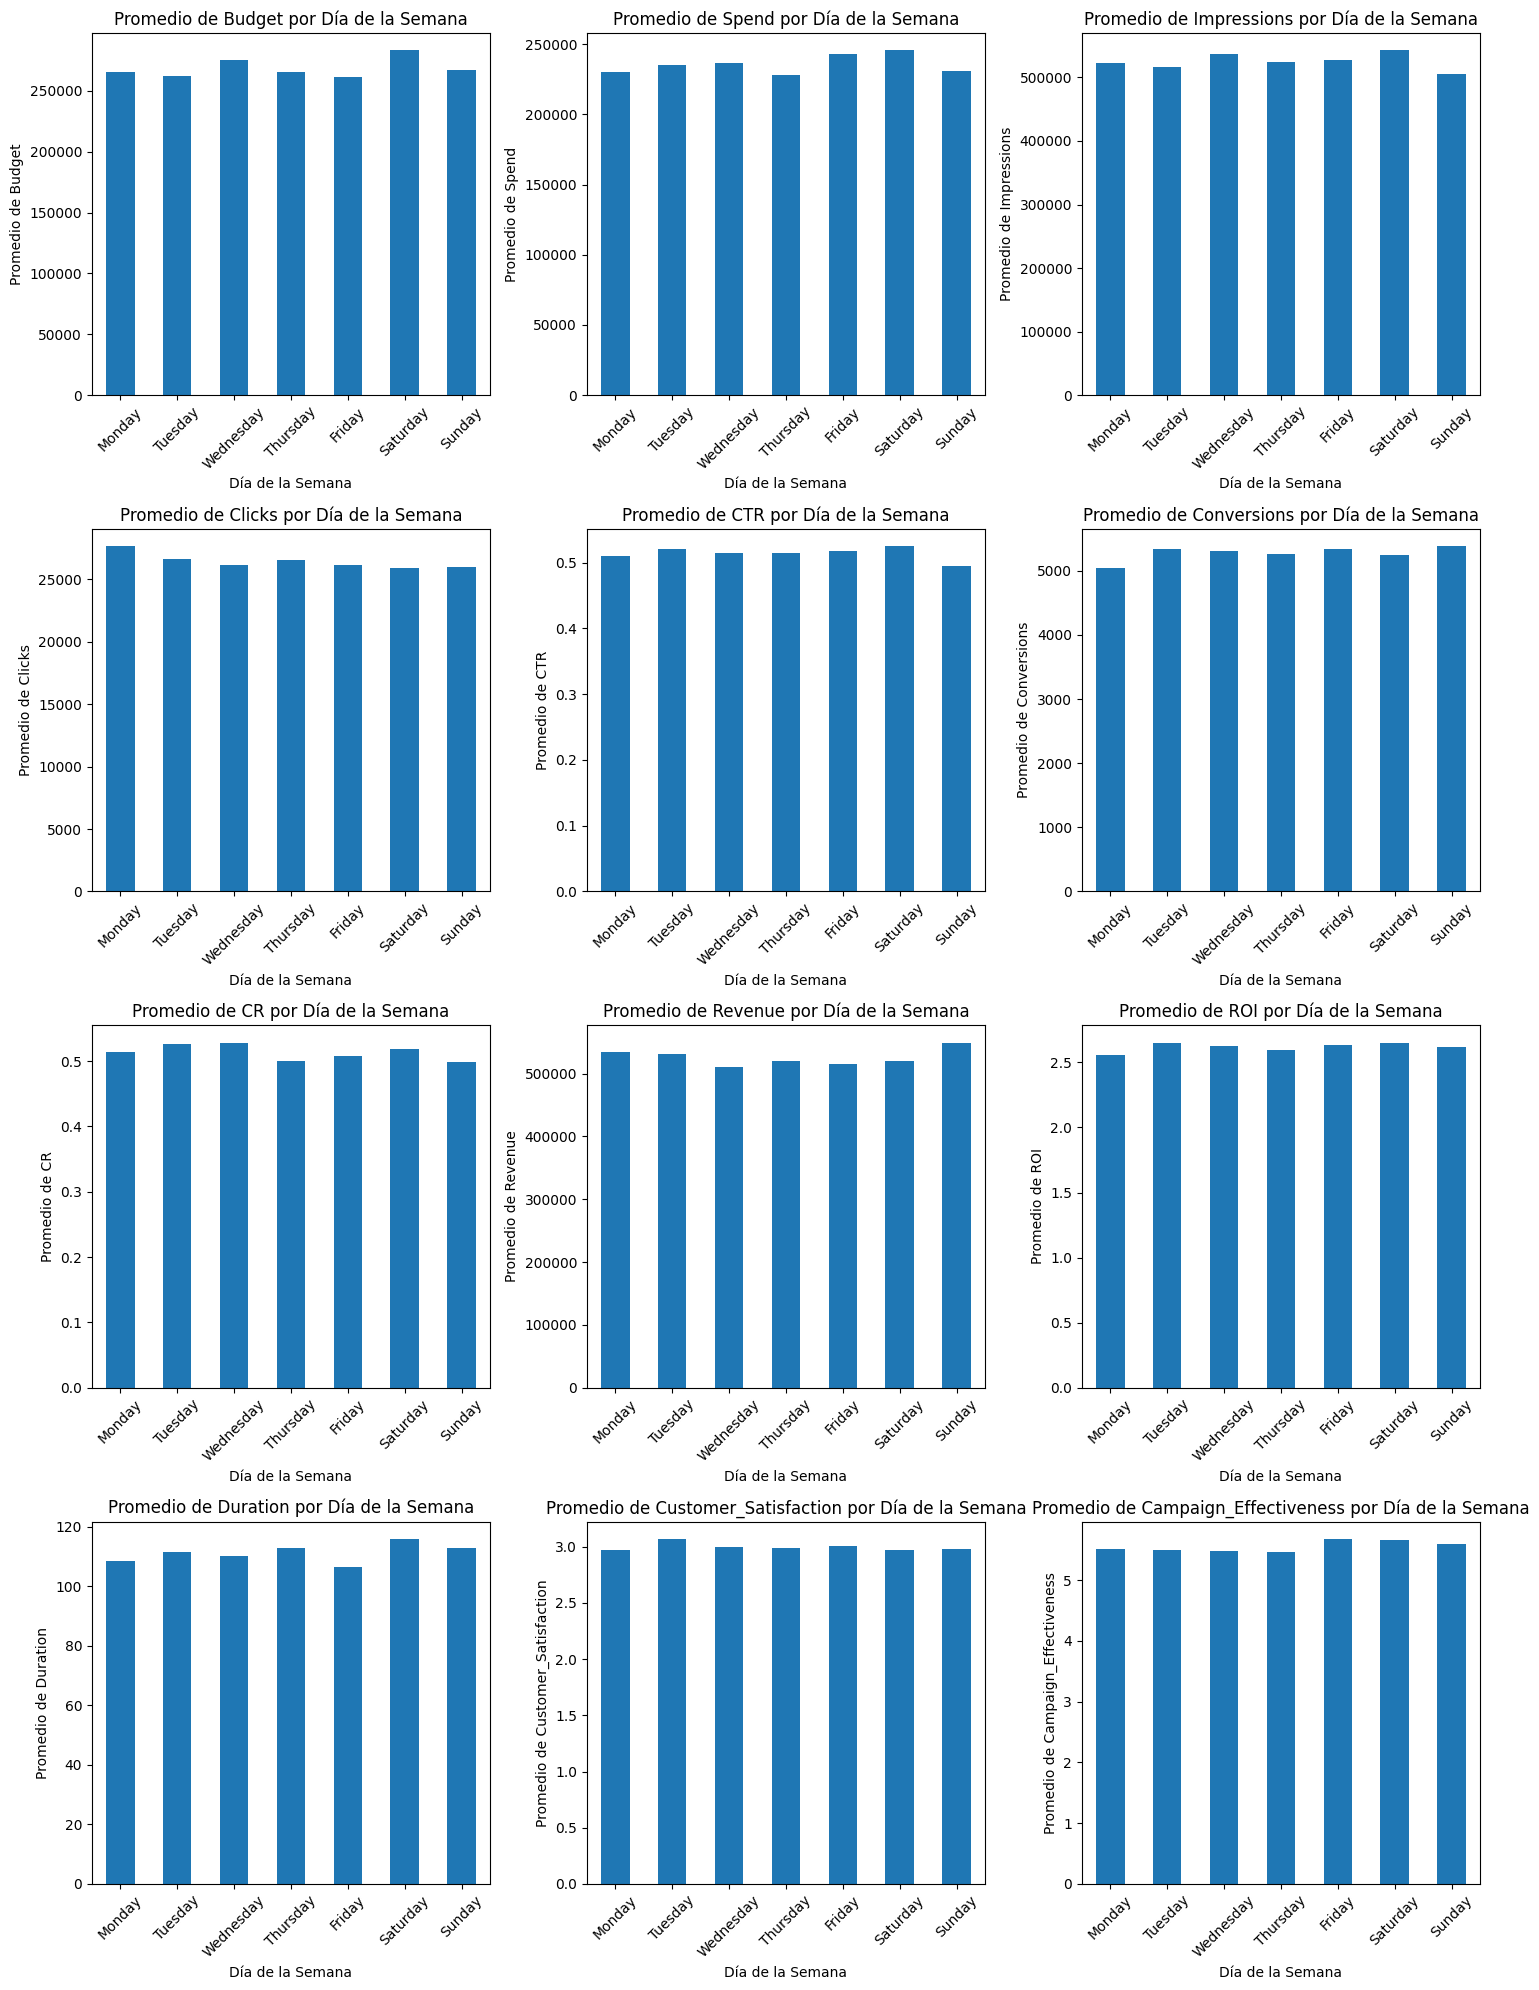

In [38]:
# Crear columnas para el día de la semana y el mes
df2['Weekday'] = df2['Start_Date'].dt.day_name()
df2['Month'] = df2['Start_Date'].dt.month_name()

# Definir el orden correcto de los días de la semana
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Seleccionar columnas numéricas
numerical_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Agrupar por 'Weekday' y calcular la media de las variables numéricas
weekday_data = df2.groupby('Weekday')[numerical_columns].mean().reindex(weekdays)

# Definir el número de columnas para el lienzo
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Generar gráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    weekday_data[col].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Promedio de {col} por Día de la Semana')
    axes[i].set_xlabel('Día de la Semana')
    axes[i].set_ylabel(f'Promedio de {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos si los hay
for ax in axes[len(numerical_columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

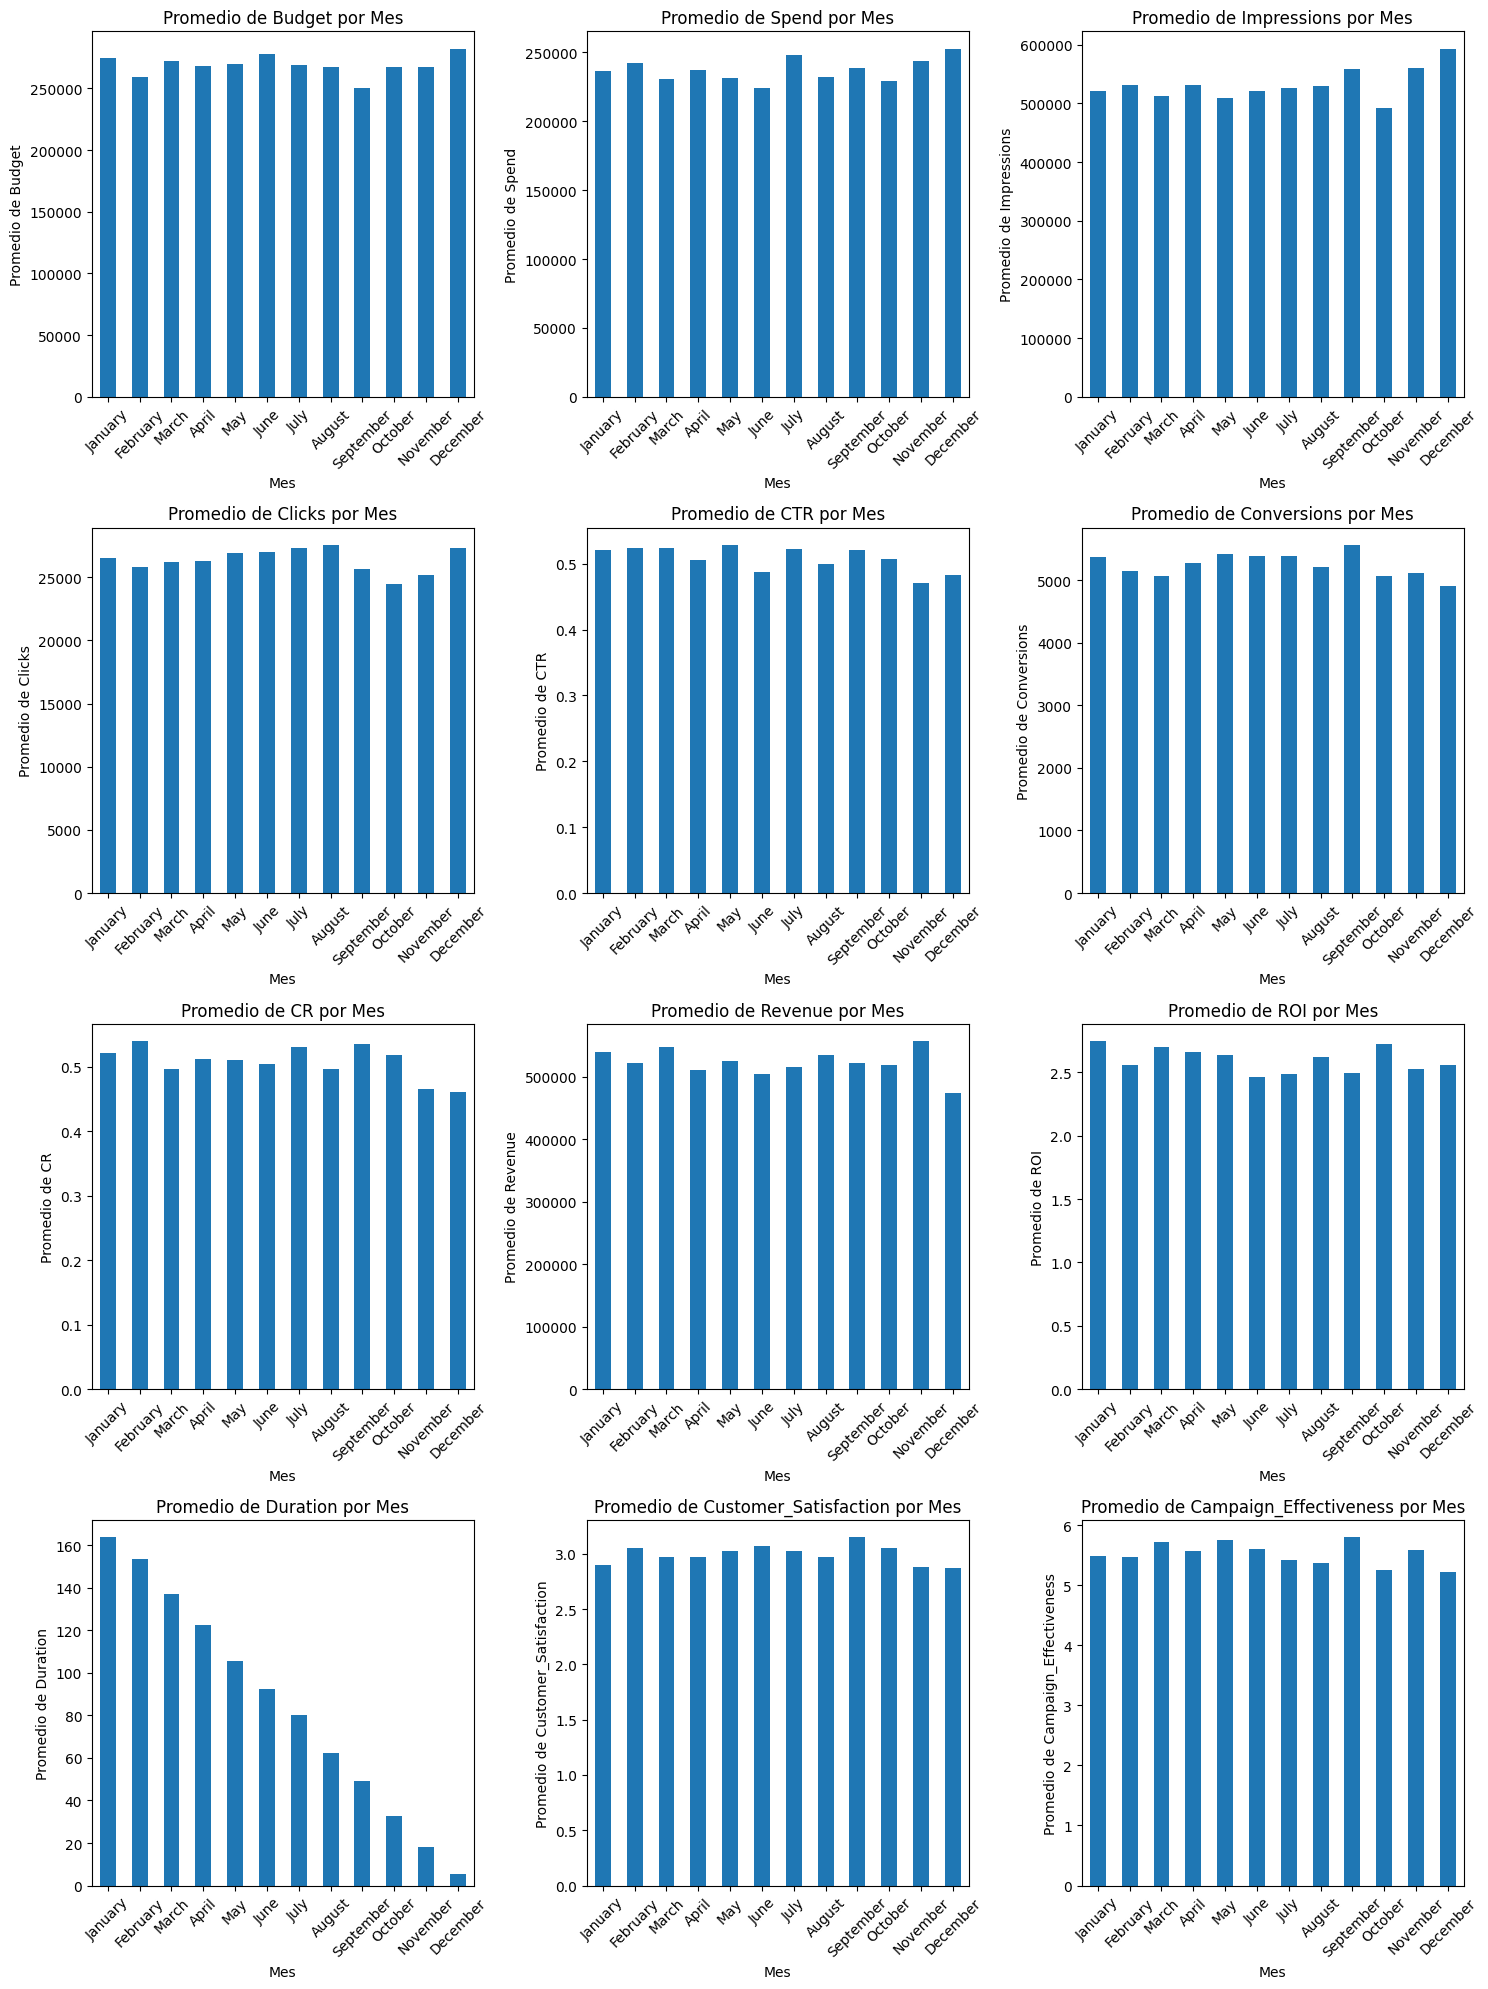

In [39]:
# Definir el orden correcto de los meses
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']

# Agrupar por 'Month' y calcular la media de las variables numéricas
month_data = df2.groupby('Month')[numerical_columns].mean()
month_data = month_data.reindex(months_order)

# Definir el número de columnas para el lienzo
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Generar gráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    month_data[col].dropna().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Promedio de {col} por Mes')
    axes[i].set_xlabel('Mes')
    axes[i].set_ylabel(f'Promedio de {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos si los hay
for ax in axes[len(numerical_columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

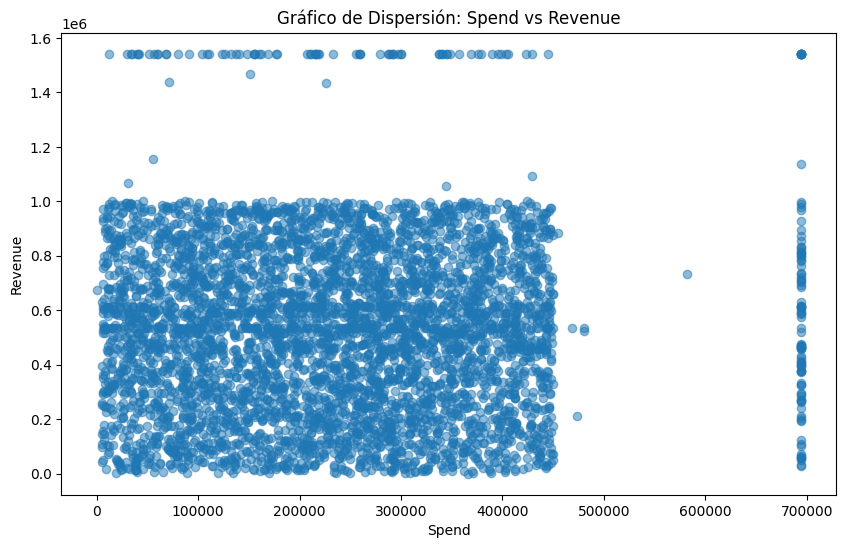

In [40]:
# Creamos un grafico de dispersion para las variables Spend y Revenue
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df2['Spend'], df2['Revenue'], alpha=0.5)

# Etiquetas y título
plt.title('Gráfico de Dispersión: Spend vs Revenue')
plt.xlabel('Spend')
plt.ylabel('Revenue')

# Mostrar el gráfico
plt.show()
import plotly.express as px

# Crear el gráfico de dispersión con Plotly Express
fig = px.scatter(df2, x='Spend', y='Revenue', title='Gráfico de Dispersión: Spend vs Revenue', opacity=0.5)

# Mostrar el gráfico
fig.show()

In [41]:
# Contar el número de entradas por 'Channel'
channel_counts = df2['Channel'].value_counts().reset_index()
channel_counts.columns = ['Channel', 'Count']

# Crear el gráfico de barras
fig = px.bar(
    channel_counts,
    x='Channel',
    y='Count',
    title='Distribución de las Campañas por Canal',
    labels={
        'Channel': 'Canal',
        'Count': 'Cantidad de Campañas'
    },
    color='Channel',
    text='Count'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_title='Canales',
    yaxis_title='Cantidad de Campañas',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45)

# Mostrar el gráfico
fig.show()

In [42]:
# Agrupar los datos por 'Channel' y sumar 'Revenue'
channel_revenue = df2.groupby('Channel')['Revenue'].sum().reset_index()

# Crear el gráfico de barras comparativo
fig = px.bar(
    channel_revenue,
    x='Channel',
    y='Revenue',
    title='Comparativa de Ingresos por Canales',
    labels={
        'Channel': 'Canales',
        'Revenue': 'Ingresos'
    },
    color='Channel',
    text='Revenue'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_traces(texttemplate='$%{text:,.2f}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_title='Canal',
    yaxis_title='Ingresos',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45, categoryorder='total descending')

# Mostrar el gráfico
fig.show()

In [43]:
# Contar el número de entradas por 'Product_Category'
product_counts = df2['Product_Category'].value_counts().reset_index()
product_counts.columns = ['Product_Category', 'Count']

# Crear el gráfico de barras
fig = px.bar(
    product_counts,
    x='Product_Category',
    y='Count',
    title='Distribución de las Campañas por Tipologia de Productos',
    labels={
        'Product_Category': 'Linea de Producto',
        'Count': 'Cantidad de Campañas'
    },
    color='Product_Category',
    text='Count'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_title='Categoria de Producto',
    yaxis_title='Cantidad de Campañas',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45)

# Mostrar el gráfico
fig.show()

In [44]:
# Agrupar los datos por 'Channel' y sumar 'Revenue'
product_revenue = df2.groupby('Product_Category')['Revenue'].sum().reset_index()

# Crear el gráfico de barras comparativo
fig = px.bar(
    product_revenue,
    x='Product_Category',
    y='Revenue',
    title='Comparativa de Ingresos por Categoria de Producto',
    labels={
        'Product_Category': 'Categoria de Producto',
        'Revenue': 'Ingresos'
    },
    color='Product_Category',
    text='Revenue'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_traces(texttemplate='$%{text:,.2f}', textposition='inside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_title='Categoria de Producto',
    yaxis_title='Ingresos',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45, categoryorder='total descending')

# Mostrar el gráfico
fig.show()

In [45]:
# Contar el número de entradas por 'Market_Segment'
market_counts = df2['Market_Segment'].value_counts().reset_index()
market_counts.columns = ['Market_Segment', 'Count']

# Crear el gráfico de barras
fig = px.bar(
    market_counts,
    x='Market_Segment',
    y='Count',
    title='Distribución de las Campañas por Tipo de Mercado',
    labels={
        'Market_Segment': 'Tipo de Mercado',
        'Count': 'Cantidad de Campañas'
    },
    color='Market_Segment',
    text='Count'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_title='Tipo de Mercado',
    yaxis_title='Cantidad de Campañas',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45)

# Mostrar el gráfico
fig.show()

In [93]:
# Agrupar los datos por 'Market_Segment' y sumar 'Revenue'
market_revenue = df2.groupby('Market_Segment')['Revenue'].sum().reset_index()

# Crear el gráfico de barras comparativo
fig = px.bar(
    market_revenue,
    x='Market_Segment',
    y='Revenue',
    title='Comparativa de Ingresos por Tipologia de Mercado',
    labels={
        'Market_Segment': 'Tipologia de Mercado',
        'Revenue': 'Ingresos'
    },
    color='Market_Segment',
    text='Revenue'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_traces(texttemplate='$%{text:,.2f}', textposition='inside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_title='Tipoplogia de Mercado',
    yaxis_title='Ingresos',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0, categoryorder='total descending')

# Mostrar el gráfico
fig.show()

In [95]:
# Agrupar los datos por 'Region' y sumar 'Spend' y 'Revenue'
df_grouped = df2.groupby('Region').agg({
    'Spend': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Ordenar el DataFrame por 'Spend' de mayor a menor
df_grouped = df_grouped.sort_values(by='Spend', ascending=False)

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_grouped,
    x='Region',
    y=['Spend', 'Revenue'],
    title='Comparativa de Spend y Revenue por Región',
    labels={
        'Region': 'Región',
        'value': 'Monto (Spend y Revenue)',
        'variable': 'Métrica'
    },
    barmode='group'
)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Región',
    yaxis_title='Monto (Spend y Revenue)',
    legend_title='Métrica',
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Mostrar el gráfico
fig.show()


In [103]:
# Agrupar los datos por 'Market_Segment' y 'Product_Category' y sumar 'Revenue'
df_grouped = df2.groupby(['Market_Segment', 'Product_Category']).agg({
    'Revenue': 'sum'
}).reset_index()

# Ordenar los resultados de mayor a menor Revenue
df_grouped = df_grouped.sort_values(by='Revenue', ascending=False)

# Crear el gráfico de barras comparativo con Plotly Express
fig = px.bar(
    df_grouped,
    x='Market_Segment',
    y='Revenue',
    color='Product_Category',
    barmode='group',
    title='Comparativa de Revenue por Segmento de Mercado y Categoria de Producto',
    labels={
        'Market_Segment': 'Segmento de Mercado',
        'Revenue': 'Ingresos',
        'Product_Category': 'Categoría de Producto'
    },
    text='Revenue'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_traces(texttemplate='$%{text:,.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Segmento de Mercado',
    yaxis_title='Ingresos',
    legend_title='Categoría de Producto',
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Mostrar el gráfico
fig.show()

In [107]:
# Agrupar los datos por 'Product_Category' y 'Channel' y sumar 'Revenue'
df_grouped = df2.groupby(['Product_Category', 'Channel']).agg({
    'Revenue': 'sum'
}).reset_index()

# Ordenar los datos por 'Revenue' de mayor a menor dentro de cada 'Product_Category'
df_grouped = df_grouped.sort_values(['Product_Category', 'Revenue'], ascending=[True, False])

# Crear el gráfico de barras comparativo con Plotly Express
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Revenue',
    color='Channel',
    barmode='group',
    title='Comparativa de Revenue por Categoría de Producto y Canal',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Revenue': 'Ingresos',
        'Channel': 'Canal'
    },
    text='Revenue'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_traces(texttemplate='$%{text:,.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Ingresos',
    legend_title='Canal',
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Ajustar el diseño para mayor claridad
fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=80),
    height=600,
    width=1400
)

# Mostrar el gráfico
fig.show()

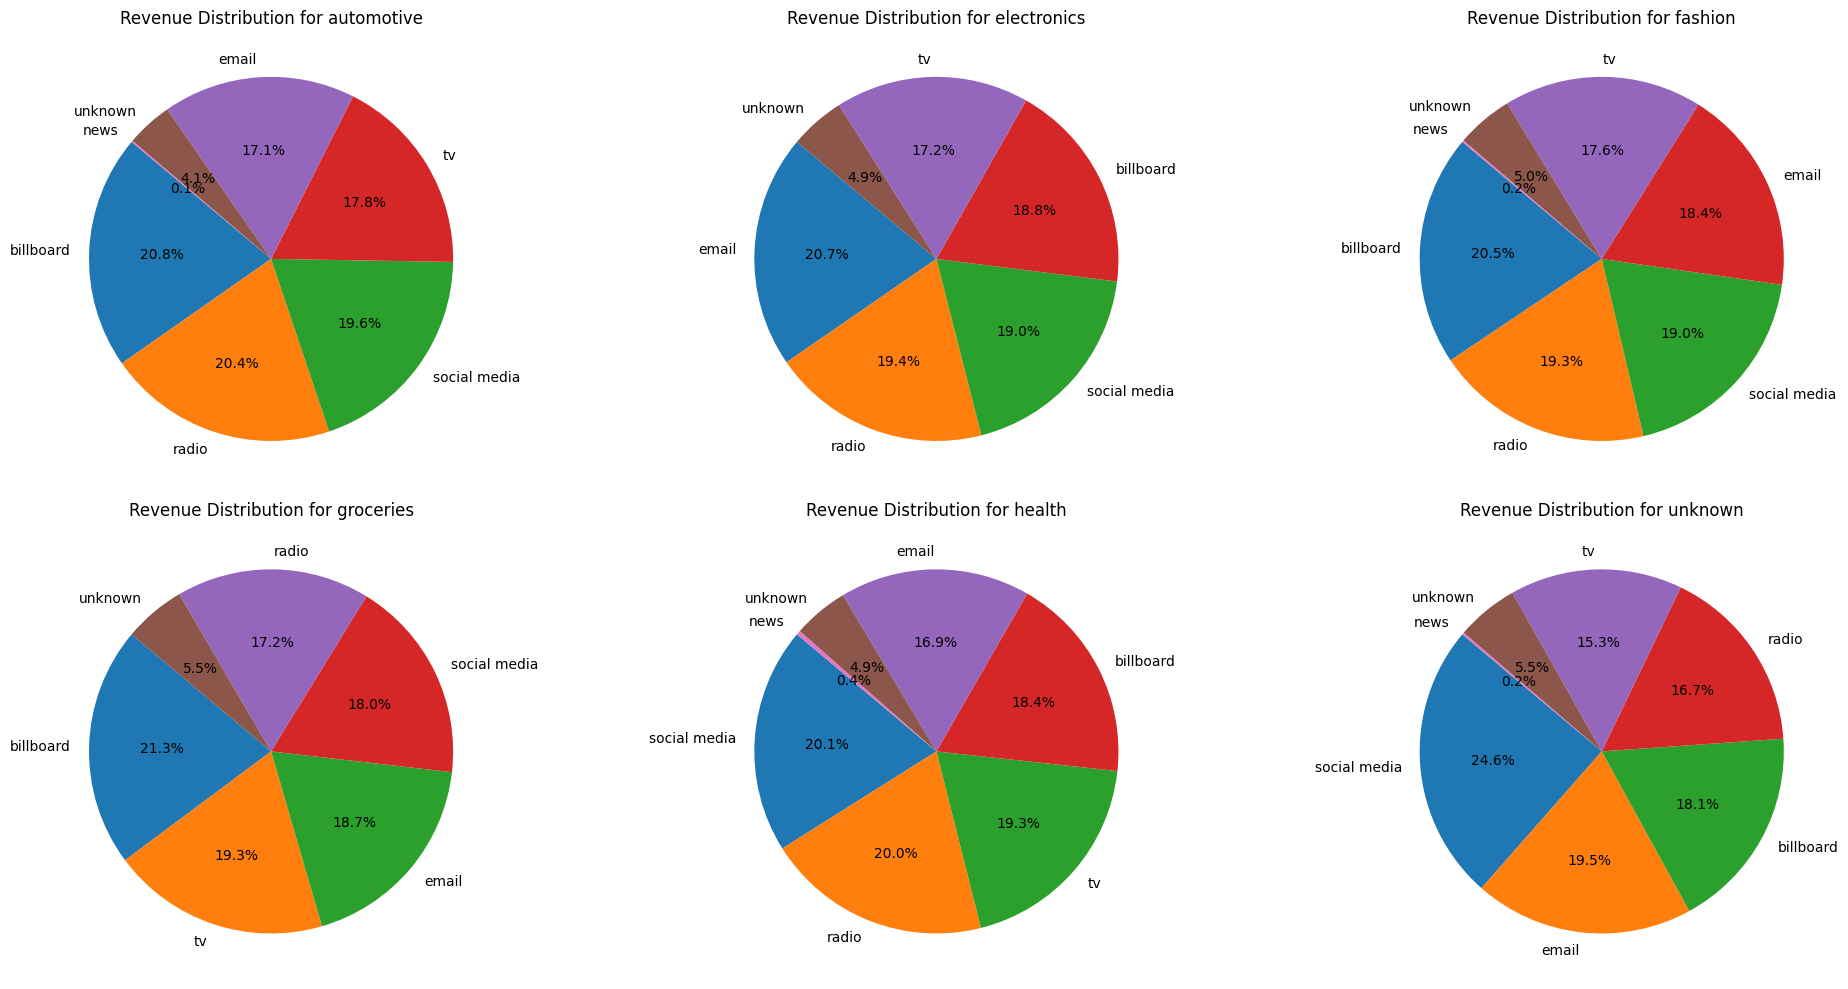

In [108]:
# Agrupar los datos por 'Product_Category' y 'Channel' y sumar 'Revenue'
df_grouped = df2.groupby(['Product_Category', 'Channel']).agg({
    'Revenue': 'sum'
}).reset_index()

# Ordenar los datos por 'Revenue' de mayor a menor dentro de cada 'Product_Category'
df_grouped = df_grouped.sort_values(['Product_Category', 'Revenue'], ascending=[True, False])

# Crear el gráfico de barras comparativo con Plotly Express
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Revenue',
    color='Channel',
    barmode='group',
    title='Comparativa de Revenue por Categoría de Producto y Canal',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Revenue': 'Ingresos',
        'Channel': 'Canal'
    },
    text='Revenue'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_traces(texttemplate='$%{text:,.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Ingresos',
    legend_title='Canal',
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Ajustar el diseño para mayor claridad
fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=80),
    height=600,
    width=1400
)

# Mostrar el gráfico
fig.show()
# Crear un lienzo con subplots
num_cols = 3  # Número de columnas en la cuadrícula
num_rows = (df_grouped['Product_Category'].nunique() + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre cada categoría de producto y crear un gráfico de torta
for i, category in enumerate(df_grouped['Product_Category'].unique()):
    data = df_grouped[df_grouped['Product_Category'] == category]
    axes[i].pie(data['Revenue'], labels=data['Channel'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Revenue Distribution for {category}')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [47]:
df_prueba = df2.copy()

In [48]:
df_prueba.dropna(inplace=True)

In [49]:
# Crear el gráfico de dispersión con Plotly Express
fig = px.scatter(df_prueba, x='Spend', y='Revenue', title='Gráfico de Dispersión: Spend vs Revenue', opacity=0.5, color='Region', size='Revenue')

# Mostrar el gráfico
fig.show()

In [113]:
# Filtrar los datos para excluir 'unknown' y 'news' en 'Channel'
df_grouped_filtered = df_grouped[~df_grouped['Channel'].isin(['unknown', 'news'])]

# Crear gráfico interactivo con Plotly Express
fig = px.bar(
    df_grouped_filtered, 
    x='Product_Category', 
    y='Revenue', 
    color='Region',
    barmode='group',
    facet_col='Channel',
    title='Productos más vendidos por Región y Canal'
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=90)

# Mostrar el gráfico
fig.show()


In [67]:
# Filtrar el DataFrame para la Región "Kuala Lumpur"
df_region = df2[df2['Region'] == 'kuala lumpur']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Kuala Lumpur',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [65]:
# Filtrar el DataFrame para la Región "Kuala Lumpur"
df_region = df2[df2['Region'].str.lower() == 'kuala lumpur']

# Agrupar por 'Product_Category' y 'Market_Segment' y contar las ocurrencias
df_grouped = df_region.groupby(['Product_Category', 'Market_Segment']).size().reset_index(name='Count')

# Crear el gráfico de barras apiladas
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Count',
    color='Market_Segment',
    title='Distribución de Segmento de Mercado por Categoría de Producto en la Región Kuala Lumpur',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Count': 'Cantidad',
        'Market_Segment': 'Segmento de Mercado'
    },
    text='Count'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Cantidad',
    legend_title='Segmento de Mercado',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Mostrar el gráfico
fig.show()


In [68]:
# Filtrar el DataFrame para la Región "Penang"
df_region = df2[df2['Region'].str.lower() == 'penang']

# Agrupar por 'Product_Category' y 'Market_Segment' y contar las ocurrencias
df_grouped = df_region.groupby(['Product_Category', 'Market_Segment']).size().reset_index(name='Count')

# Crear el gráfico de barras apiladas
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Count',
    color='Market_Segment',
    title='Distribución de Segmento de Mercado por Categoría de Producto en la Región Penang',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Count': 'Cantidad',
        'Market_Segment': 'Segmento de Mercado'
    },
    text='Count'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Cantidad',
    legend_title='Segmento de Mercado',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Mostrar el gráfico
fig.show()

In [69]:
# Filtrar el DataFrame para la Región "Penang"
df_region = df2[df2['Region'] == 'penang']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Penang',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [70]:
# Filtrar el DataFrame para la Región "Sarawak"
df_region = df2[df2['Region'].str.lower() == 'sarawak']

# Agrupar por 'Product_Category' y 'Market_Segment' y contar las ocurrencias
df_grouped = df_region.groupby(['Product_Category', 'Market_Segment']).size().reset_index(name='Count')

# Crear el gráfico de barras apiladas
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Count',
    color='Market_Segment',
    title='Distribución de Segmento de Mercado por Categoría de Producto en la Región Sarawak',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Count': 'Cantidad',
        'Market_Segment': 'Segmento de Mercado'
    },
    text='Count'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Cantidad',
    legend_title='Segmento de Mercado',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Mostrar el gráfico
fig.show()

In [71]:
# Filtrar el DataFrame para la Región "Sarawak"
df_region = df2[df2['Region'] == 'sarawak']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Sarawak',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [72]:
# Filtrar el DataFrame para la Región "Johor"
df_region = df2[df2['Region'].str.lower() == 'johor']

# Agrupar por 'Product_Category' y 'Market_Segment' y contar las ocurrencias
df_grouped = df_region.groupby(['Product_Category', 'Market_Segment']).size().reset_index(name='Count')

# Crear el gráfico de barras apiladas
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Count',
    color='Market_Segment',
    title='Distribución de Segmento de Mercado por Categoría de Producto en la Región Johor',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Count': 'Cantidad',
        'Market_Segment': 'Segmento de Mercado'
    },
    text='Count'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Cantidad',
    legend_title='Segmento de Mercado',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Mostrar el gráfico
fig.show()

In [73]:
# Filtrar el DataFrame para la Región "Johor"
df_region = df2[df2['Region'] == 'johor']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Johor',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [74]:
# Filtrar el DataFrame para la Región "Sabah"
df_region = df2[df2['Region'].str.lower() == 'sabah']

# Agrupar por 'Product_Category' y 'Market_Segment' y contar las ocurrencias
df_grouped = df_region.groupby(['Product_Category', 'Market_Segment']).size().reset_index(name='Count')

# Crear el gráfico de barras apiladas
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Count',
    color='Market_Segment',
    title='Distribución de Segmento de Mercado por Categoría de Producto en la Región Sabah',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Count': 'Cantidad',
        'Market_Segment': 'Segmento de Mercado'
    },
    text='Count'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Cantidad',
    legend_title='Segmento de Mercado',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Mostrar el gráfico
fig.show()

In [75]:
# Filtrar el DataFrame para la Región "Sabah"
df_region = df2[df2['Region'] == 'sabah']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Sabah',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [77]:
# Filtrar el DataFrame para la Región "Malacca"
df_region = df2[df2['Region'] == 'malacca']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Malacca',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [76]:
# Filtrar el DataFrame para la Región "Malacca"
df_region = df2[df2['Region'].str.lower() == 'malacca']

# Agrupar por 'Product_Category' y 'Market_Segment' y contar las ocurrencias
df_grouped = df_region.groupby(['Product_Category', 'Market_Segment']).size().reset_index(name='Count')

# Crear el gráfico de barras apiladas
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Count',
    color='Market_Segment',
    title='Distribución de Segmento de Mercado por Categoría de Producto en la Región Malacca',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Count': 'Cantidad',
        'Market_Segment': 'Segmento de Mercado'
    },
    text='Count'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Cantidad',
    legend_title='Segmento de Mercado',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Mostrar el gráfico
fig.show()

In [53]:
# Filtrar el DataFrame para la Región "Penangr"
df_region = df2[df2['Region'] == 'penang']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Penangs',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [78]:
# Filtrar el DataFrame para la Región "Unknown"
df_region = df2[df2['Region'].str.lower() == 'unknown']

# Agrupar por 'Product_Category' y 'Market_Segment' y contar las ocurrencias
df_grouped = df_region.groupby(['Product_Category', 'Market_Segment']).size().reset_index(name='Count')

# Crear el gráfico de barras apiladas
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Count',
    color='Market_Segment',
    title='Distribución de Segmento de Mercado por Categoría de Producto en la Región Unknown',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Count': 'Cantidad',
        'Market_Segment': 'Segmento de Mercado'
    },
    text='Count'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Cantidad',
    legend_title='Segmento de Mercado',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Mostrar el gráfico
fig.show()

In [80]:
# Filtrar el DataFrame para la Región "Unknown"
df_region = df2[df2['Region'] == 'unknown']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Unknown',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [54]:
# Filtrar el DataFrame para la Región "Sarawak"
df_region = df2[df2['Region'] == 'sarawak']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Sarawak',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [55]:
# Filtrar el DataFrame para la Región "Johor"
df_region = df2[df2['Region'] == 'johor']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Johor',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [56]:
# Filtrar el DataFrame para la Región "Sabah"
df_region = df2[df2['Region'] == 'sabah']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Sabah',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [57]:
# Filtrar el DataFrame para la Región "Malacca"
df_region = df2[df2['Region'] == 'malacca']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Malacca',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [81]:
# Filtrar el DataFrame para la Región "Unknownr"
df_region = df2[df2['Region'] == 'unknown']

# Agrupar por 'Product_Category' y sumar 'Spend', 'Revenue', 'Impressions' y 'Duration'
df_grouped = df_region.groupby('Product_Category').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Transformar el DataFrame para Plotly Express (formato largo)
df_melted = df_grouped.melt(id_vars='Product_Category', value_vars=['Spend', 'Revenue', 'Impressions'],
                            var_name='Métrica', value_name='Monto')

# Crear el gráfico de barras comparativo
fig = px.bar(
    df_melted,
    x='Product_Category',
    y='Monto',
    color='Métrica',
    barmode='group',
    title='Comparativa de Spend, Revenue y Impressions por Categoría de Producto en la Región Unknown',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Monto': 'Monto (Spend, Revenue y Impressions)',
        'Métrica': 'Métrica'
    },
    text='Monto'  # Añade etiquetas con los valores
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Monto (Spend, Revenue y Impressions)',
    legend_title='Métrica',
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=0)

# Añadir etiquetas de valor encima de las barras
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Ajustar el diseño para mayor claridad
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar el gráfico
fig.show()

In [59]:
# Agrupar los datos por 'Product_Category' y 'Region' y sumar 'Revenue'
df_grouped = df2.groupby(['Product_Category', 'Region']).agg({'Revenue': 'sum'}).reset_index()

# Crear gráfico de barras comparativo con Plotly Express
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Revenue',
    color='Region',
    barmode='group',
    title='Comparativa de Product_Category por Región',
    labels={
        'Product_Category': 'Categoría de Producto',
        'Revenue': 'Ingresos',
        'Region': 'Región'
    }
)

# Mostrar el gráfico
fig.show()

In [83]:

# Agrupar los datos por 'Product_Category', 'Region' y sumar 'Revenue'
df_grouped = df2.groupby(['Product_Category', 'Region']).agg({'Revenue': 'sum'}).reset_index()

# Crear gráfico de barras con facetas por 'Region'
fig = px.bar(
    df_grouped,
    x='Product_Category',
    y='Revenue',
    color='Product_Category',
    facet_col='Region',
    title='Ingresos por Categoría de Producto y Región',
    labels={
        'Product_Category': '',
        'Revenue': 'Ingresos'
    },
    category_orders={'Region': sorted(df2['Region'].unique())},
    height=600,
    width=1200
)

# Actualizar el diseño para mejorar la visualización
fig.update_layout(showlegend=False)
fig.update_xaxes(tickangle=45)

# Mostrar el gráfico
fig.show()

In [114]:
# Agrupar los datos por 'Region' y contar el número de 'Campaign_ID'
campaign_counts = df2.groupby('Region')['Campaign_ID'].nunique().reset_index()

# Renombrar las columnas para mayor claridad
campaign_counts.rename(columns={'Campaign_ID': 'Número de Campañas'}, inplace=True)

# Crear el gráfico de barras comparativo con Plotly Express
fig = px.bar(
    campaign_counts,
    x='Region',
    y='Número de Campañas',
    color='Region',
    title='Número de Campañas por Región',
    labels={
        'Region': 'Región',
        'Número de Campañas': 'Número de Campañas'
    },
    text='Número de Campañas',
    category_orders={'Region': campaign_counts.sort_values('Número de Campañas', ascending=False)['Region']}
)

# Mejorar la visualización
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_title='Región',
    yaxis_title='Número de Campañas',
    legend_title='Región',
    title={
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Rotar etiquetas del eje X para mejor legibilidad
fig.update_xaxes(tickangle=45)

# Ajustar el tamaño del gráfico si es necesario
fig.update_layout(
    height=600,
    width=1000,
    margin=dict(l=40, r=40, t=80, b=80)
)

# Mostrar el gráfico
fig.show()

In [61]:
# Calcular el coeficiente de correlación
correlation = df2['Spend'].corr(df2['Revenue'])
print(f'El coeficiente de correlación entre Spend y Revenue es: {correlation:.2f}')

El coeficiente de correlación entre Spend y Revenue es: 0.01


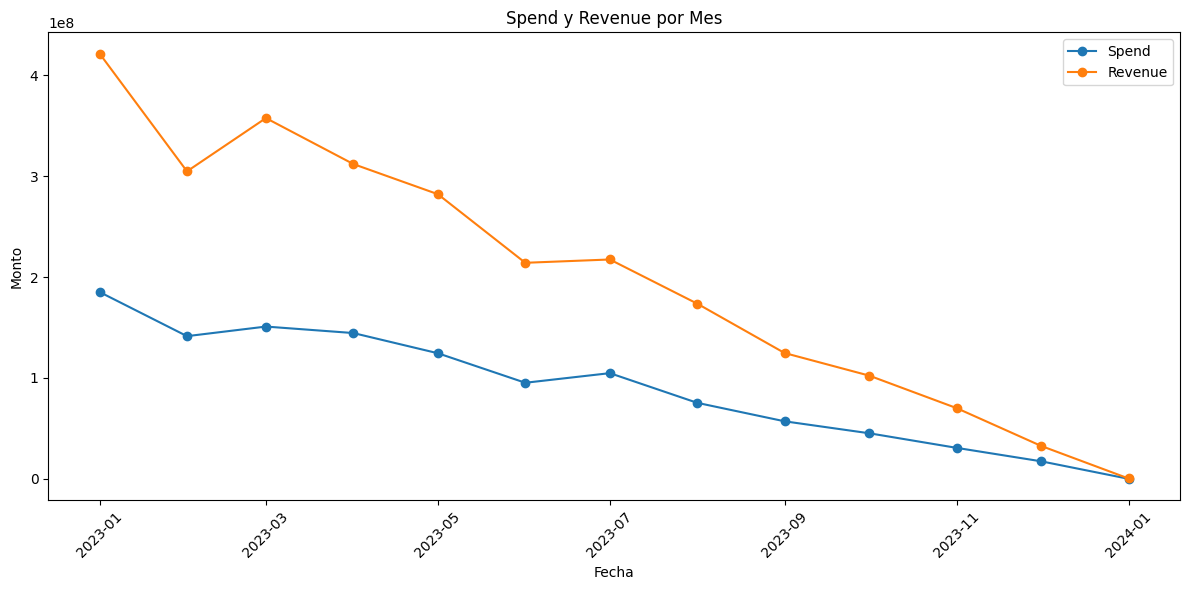

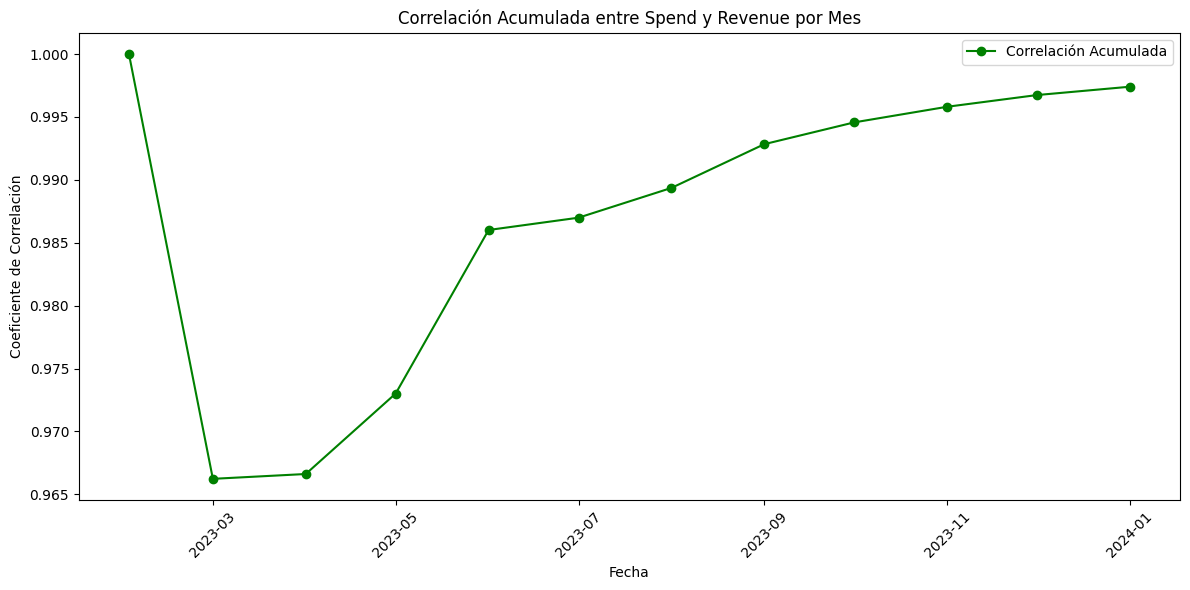

In [62]:
# Crear una columna para el mes y el año
df2['Month_Year'] = df2['Start_Date'].dt.to_period('M')

# Agrupar por 'Month_Year' y calcular las sumas mensuales de 'Spend' y 'Revenue'
monthly_data = df2.groupby('Month_Year')[['Spend', 'Revenue']].sum().reset_index()

# Convertir 'Month_Year' a tipo datetime para poder graficar
monthly_data['Month_Year'] = monthly_data['Month_Year'].dt.to_timestamp()

# Calcular la correlación acumulada entre 'Spend' y 'Revenue' a lo largo del tiempo
monthly_data['Cumulative_Correlation'] = monthly_data['Spend'].expanding().corr(monthly_data['Revenue'])

# Crear el gráfico de 'Spend' y 'Revenue' mensuales
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month_Year'], monthly_data['Spend'], label='Spend', marker='o')
plt.plot(monthly_data['Month_Year'], monthly_data['Revenue'], label='Revenue', marker='o')

plt.title('Spend y Revenue por Mes')
plt.xlabel('Fecha')
plt.ylabel('Monto')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crear el gráfico de la correlación acumulada mensual
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month_Year'], monthly_data['Cumulative_Correlation'], label='Correlación Acumulada', marker='o', color='green')

plt.title('Correlación Acumulada entre Spend y Revenue por Mes')
plt.xlabel('Fecha')
plt.ylabel('Coeficiente de Correlación')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()